Part 1

In [2]:
!pip install gymnasium matplotlib numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 925.5/925.5 kB 4.8 MB/s eta 0:00:00


In [3]:
from google.colab import widgets
import gymnasium as gym
from gymnasium import spaces
import matplotlib.pyplot as plt
import numpy as np
import time
import math

In [4]:
class GridEnvironment(gym.Env):
    metadata = { 'render.modes': [] }
    
    def __init__(self,timesteps):

        self.observation_space = spaces.Discrete(16)
        self.action_space = spaces.Discrete(4)
        self.max_timesteps = timesteps
        self.timestep = 0
        self.agent_pos = [0, 0]
        self.goal_pos = [3, 3]
        self.state = np.zeros((4,4))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.5
        self.reward_neg_5=[2,0]
        self.reward_neg_6=[3,1]
        self.reward_5=[0,3]
        self.reward_6=[1,3]
        
    def reset(self, **kwargs):
        self.timestep=0
        self.agent_pos=[0,0]
        self.state = np.zeros((4,4))
        self.state[tuple(self.goal_pos)] = 0.5
        self.state[tuple(self.reward_neg_5)]=-0.2
        self.state[tuple(self.reward_neg_6)]=-0.3
        self.state[tuple(self.reward_5)]=0.2
        self.state[tuple(self.reward_6)]=0.3
        self.state[tuple(self.agent_pos)] = 1
        

        observation = self.state.flatten()

        info = {}

        return observation, info
    
    def step(self, action):

        if action == 0:
          self.agent_pos[0] += 1
        if action == 1:
          self.agent_pos[0] -= 1
        if action == 2:
          self.agent_pos[1] += 1
        if action == 3:
          self.agent_pos[1] -= 1

        
        self.agent_pos = np.clip(self.agent_pos, 0, 3)

        self.state = np.zeros((4,4))
        self.state[tuple(self.reward_neg_5)]=-0.2
        self.state[tuple(self.reward_neg_6)]=-0.3
        self.state[tuple(self.reward_5)]=0.2
        self.state[tuple(self.reward_6)]=0.3
        self.state[tuple(self.goal_pos)] = 0.5
        self.state[tuple(self.agent_pos)] = 1

        observation = self.state.flatten()
        reward=0
        if np.array_equal(self.agent_pos, self.reward_neg_5):
          reward = -5
        elif np.array_equal(self.agent_pos, self.reward_neg_6):
          reward = -6
        elif np.array_equal(self.agent_pos, self.reward_6):
          reward = 6           
        elif np.array_equal(self.agent_pos, self.reward_5):
          reward = 5
        elif np.array_equal(self.agent_pos, self.goal_pos):
          reward = 1          
        self.timestep += 1

        terminated = True if (self.timestep >= self.max_timesteps or np.array_equal(self.agent_pos, self.goal_pos)) else False
        truncated = True if np.all((self.agent_pos >=0 ) & (self.agent_pos <= 3)) else False

        info = {}
        return observation, reward, terminated, truncated, info
        
    def render(self):
         plt.imshow(self.state)
         plt.show()

In [5]:
class RandomAgent:
  def __init__(self, env):
    self.env = env
    self.observation_space = env.observation_space
    self.action_space = env.action_space

  def step(self, obs):
    return np.random.choice(self.action_space.n)

""
""
""
""
""
""
""
""
""
""
""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Inital State is in Yellow


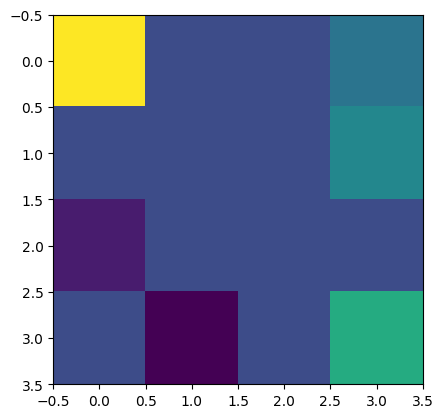

<IPython.core.display.Javascript object>

Action= Left
Reward after 1th timestep  0
Current State in the Grid is denoted by 1 which is [ 1.   0.   0.   0.2  0.   0.   0.   0.3 -0.2  0.   0.   0.   0.  -0.3
  0.   0.5]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 After 1th action Step Current State is in Yellow


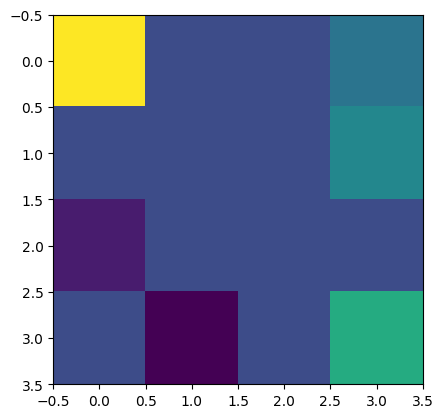

<IPython.core.display.Javascript object>

Action= Right
Reward after 2th timestep  0
Current State in the Grid is denoted by 1 which is [ 0.   0.   0.   0.2  1.   0.   0.   0.3 -0.2  0.   0.   0.   0.  -0.3
  0.   0.5]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 After 2th action Step Current State is in Yellow


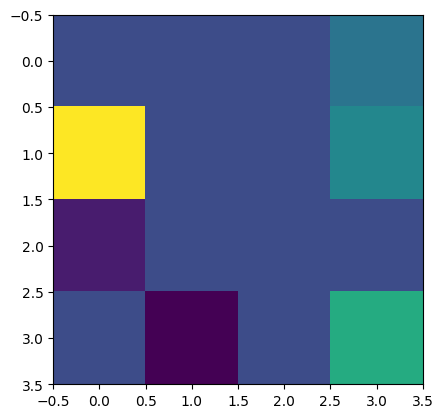

<IPython.core.display.Javascript object>

Action= Up
Reward after 3th timestep  0
Current State in the Grid is denoted by 1 which is [ 0.   0.   0.   0.2  0.   1.   0.   0.3 -0.2  0.   0.   0.   0.  -0.3
  0.   0.5]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 After 3th action Step Current State is in Yellow


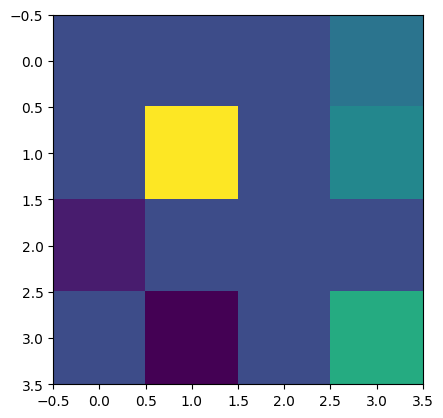

<IPython.core.display.Javascript object>

Action= Up
Reward after 4th timestep  0
Current State in the Grid is denoted by 1 which is [ 0.   0.   0.   0.2  0.   0.   1.   0.3 -0.2  0.   0.   0.   0.  -0.3
  0.   0.5]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 After 4th action Step Current State is in Yellow


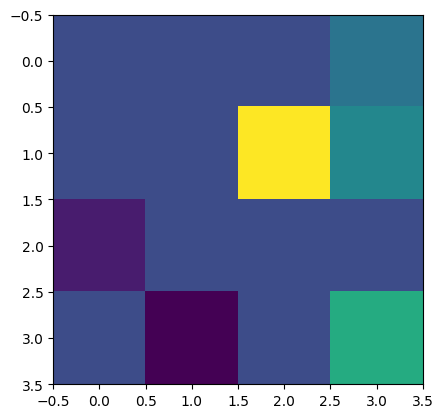

<IPython.core.display.Javascript object>

Action= Down
Reward after 5th timestep  0
Current State in the Grid is denoted by 1 which is [ 0.   0.   0.   0.2  0.   1.   0.   0.3 -0.2  0.   0.   0.   0.  -0.3
  0.   0.5]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 After 5th action Step Current State is in Yellow


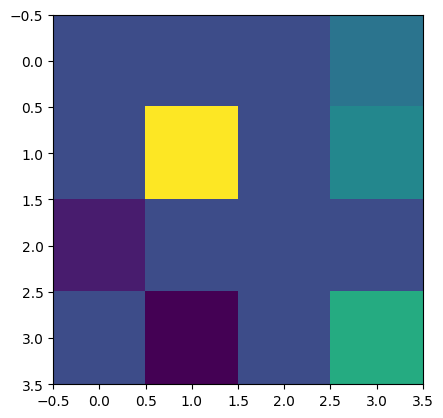

<IPython.core.display.Javascript object>

Action= Left
Reward after 6th timestep  0
Current State in the Grid is denoted by 1 which is [ 0.   1.   0.   0.2  0.   0.   0.   0.3 -0.2  0.   0.   0.   0.  -0.3
  0.   0.5]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 After 6th action Step Current State is in Yellow


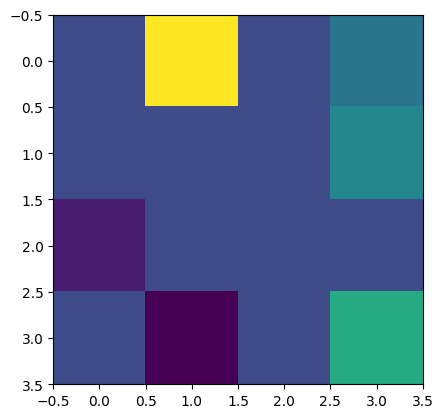

<IPython.core.display.Javascript object>

Action= Left
Reward after 7th timestep  0
Current State in the Grid is denoted by 1 which is [ 0.   1.   0.   0.2  0.   0.   0.   0.3 -0.2  0.   0.   0.   0.  -0.3
  0.   0.5]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 After 7th action Step Current State is in Yellow


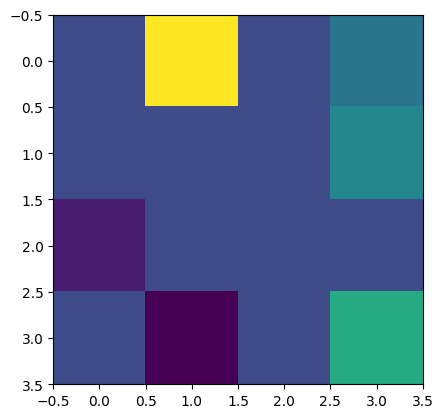

<IPython.core.display.Javascript object>

Action= Down
Reward after 8th timestep  0
Current State in the Grid is denoted by 1 which is [ 1.   0.   0.   0.2  0.   0.   0.   0.3 -0.2  0.   0.   0.   0.  -0.3
  0.   0.5]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 After 8th action Step Current State is in Yellow


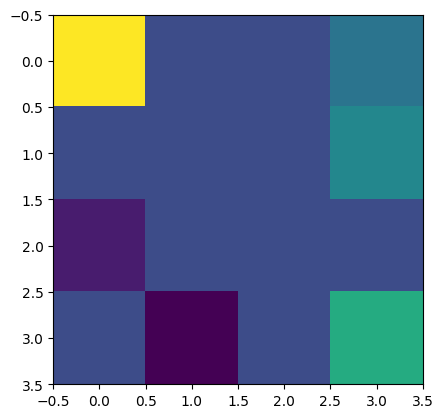

<IPython.core.display.Javascript object>

Action= Left
Reward after 9th timestep  0
Current State in the Grid is denoted by 1 which is [ 1.   0.   0.   0.2  0.   0.   0.   0.3 -0.2  0.   0.   0.   0.  -0.3
  0.   0.5]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 After 9th action Step Current State is in Yellow


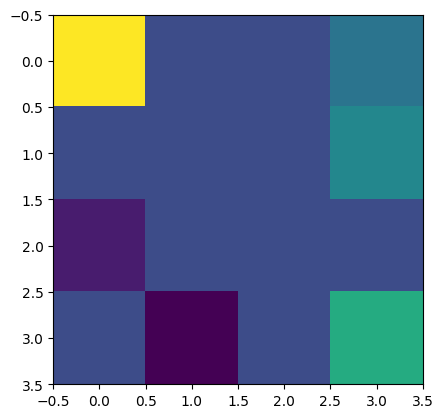

<IPython.core.display.Javascript object>

Action= Down
Reward after 10th timestep  0
Current State in the Grid is denoted by 1 which is [ 1.   0.   0.   0.2  0.   0.   0.   0.3 -0.2  0.   0.   0.   0.  -0.3
  0.   0.5]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 After 10th action Step Current State is in Yellow


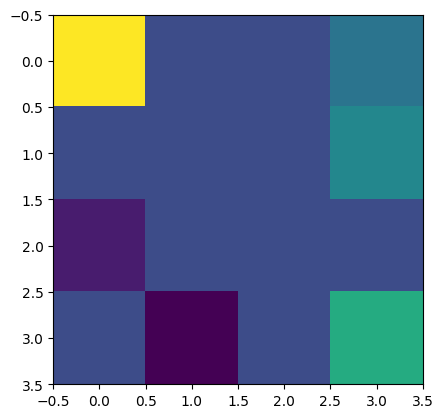

<IPython.core.display.Javascript object>

In [ ]:

env = GridEnvironment(10)
agent = RandomAgent(env)

obs, info = env.reset()
terminated, truncated = False, False

output_grid = widgets.Grid(env.max_timesteps+1, 1)

i=0
with output_grid.output_to(0,0):
  print(f'Inital State is in Yellow')
  env.render()

while not terminated:
  action = agent.step(obs)
  if action == 0:
    print('Action= Right')
  if action == 1:
    print('Action= Left')
  if action == 2:
    print('Action= Up')
  if action == 3:
    print('Action= Down')
  obs, reward, terminated, truncated, info = env.step(action)
  print(f'Reward after {i+1}th timestep  {reward}')
  print(f'Current State in the Grid is denoted by 1 which is {obs}')  
  i+=1
  with output_grid.output_to(i,0):
    print(f' After {i}th action Step Current State is in Yellow')
    env.render()


The negative rewards are in purple 

The positive rewards are in light green

The final Goal is in Dark green

The current state is in Yellow

# Part II

Creating a SARSA agent class and the hyperparameters which are ϵ-greedy,

α(learning-rate),

γ(Discount Factor),

max ϵ,

min ϵ,

Number of episodes,

Max timesteps.

Exponential Decay is the most common form of decay.

In [6]:
max_e=0.9
min_e=0.1
episodes=1000
alpha=0.8
gamma=0.9
decay_e=0.001
timesteps=20

In [17]:
class SARSAAgent:
  def __init__(self, env):
    self.env = env
    self.observation_space = env.observation_space
    self.action_space = env.action_space

  def step(self, obs,epsilon,Q):
    if np.random.uniform(0,1)< epsilon:
      action=np.random.choice(self.action_space.n)
    else:
      action=np.argmax(Q[obs,:])
    return action
         

In [8]:
env=GridEnvironment(timesteps)
Q=np.zeros((env.observation_space.n,env.action_space.n))
agent=SARSAAgent(env)
reward_episodes=[]
for episode in range(episodes):
  obs,info=env.reset()
  terminated,truncated=False,False
  epsilon = min_e + (max_e - min_e) * math.exp(-decay_e * episode)
  state=env.agent_pos[0]*4+env.agent_pos[1]
  action=agent.step(state,epsilon,Q)
  reward_covered=0
  rewards_in_episode=[]
  while not terminated:
    obs2,reward,terminated,truncated,info=env.step(action)
    action2=agent.step(state,epsilon,Q)
    state2=env.agent_pos[0]*4+env.agent_pos[1]
    if(state!=15):
      Q[state,action]= Q[state,action]+alpha*(reward+gamma*Q[state2,action2]-Q[state,action])
    if reward not in rewards_in_episode:
      rewards_in_episode.append(reward)
    state=state2
    action=action2
  reward_episodes.append(sum(rewards_in_episode))

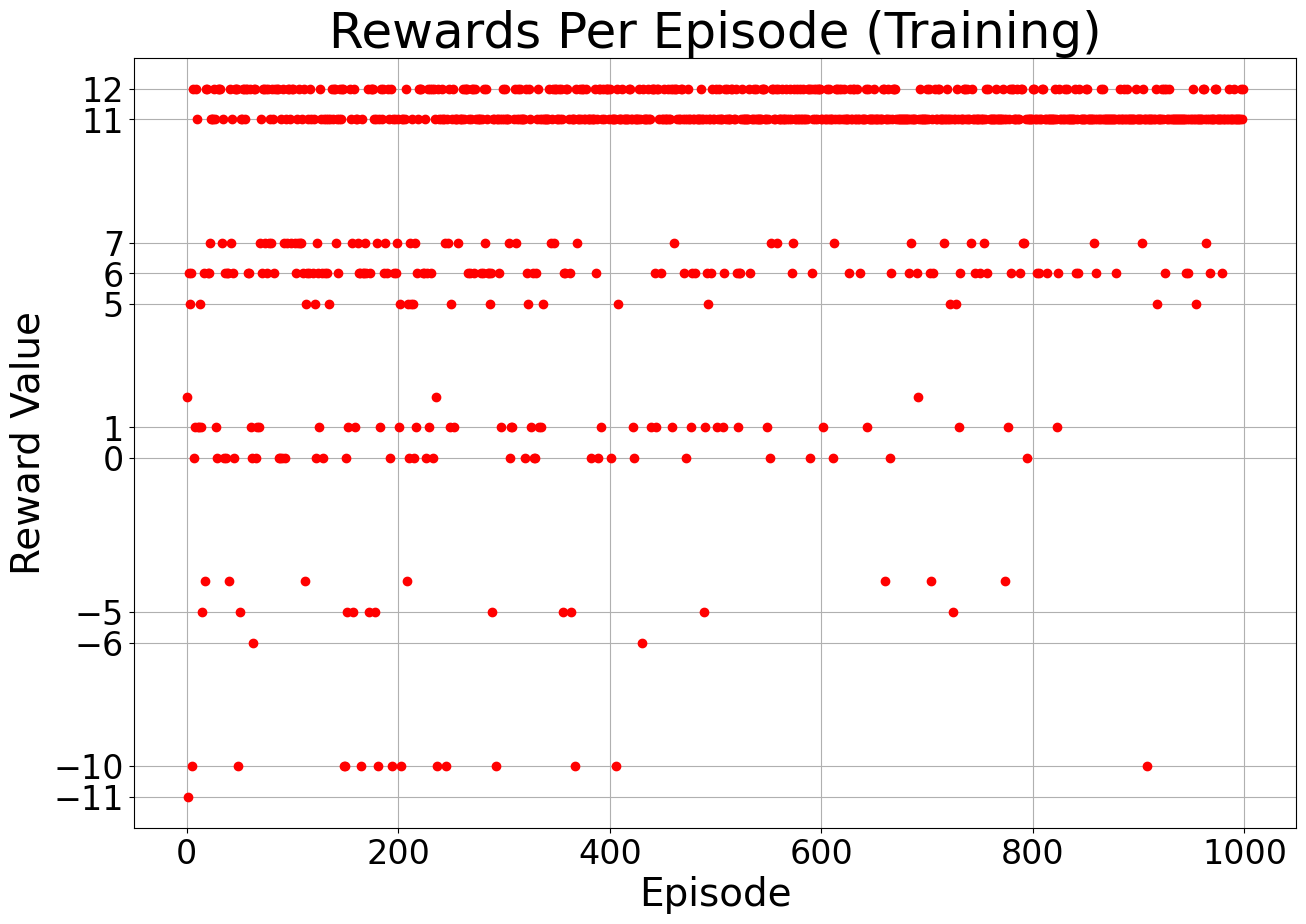

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(reward_episodes, 'ro')
plt.xlabel('Episode', fontsize=28)
plt.ylabel('Reward Value', fontsize=28)
plt.title('Rewards Per Episode (Training)', fontsize=36)
plt.xticks(fontsize=24)
plt.yticks([-11,-10,-6, -5, 0,1, 5,6,7,11,12], fontsize=24)
plt.ylim(ymin=-12, ymax=13)
plt.grid()
plt.show()

The -20 indicates that that the steps were back and forth at -5 multiple times.

### 2. Changing the Hyperparameters

After certain number of episodes after 100 the reward values never went 
negative this shows that SARSA is acting as expected but it has not covered both the positive reward values and maybe epsilon decayed too quickly.

Let's change the hyper parameters of epsilon decay rate to a smaller one 0.001 and Max timesteps to 50.

In [ ]:
decay_e=0.0001
timesteps=50

In [ ]:
env=GridEnvironment(timesteps)
Q=np.zeros((env.observation_space.n,env.action_space.n))
agent=SARSAAgent(env)
reward_episodes2=[]
for episode in range(episodes):
  obs,info=env.reset()
  terminated,truncated=False,False
  epsilon = min_e + (max_e - min_e) * math.exp(-decay_e * episode)
  state=env.agent_pos[0]*4+env.agent_pos[1]
  action=agent.step(state,epsilon,Q)
  reward_covered=0
  rewards_in_episode=[]
  while not terminated:
    obs2,reward,terminated,truncated,info=env.step(action)
    action2=agent.step(state,epsilon,Q)
    state2=env.agent_pos[0]*4+env.agent_pos[1]
    Q[state,action]= Q[state,action]+alpha*(reward+gamma*Q[state2,action2]-Q[state,action])
    if reward not in rewards_in_episode:
      rewards_in_episode.append(reward)
    state=state2
    action=action2
  reward_episodes2.append(sum(rewards_in_episode))

reward_episodes_evaluation_SARSA_2=[]
# Evaluation Results using the Q-values
for i in range(10):
  obs,info=env.reset()
  terminated,truncated=False,False
  episilon=0 # since we are trying to get only greedy actions
  state=env.agent_pos[0]*4+env.agent_pos[1]
  action=agent.step(state,epsilon,Q)
  rewards_in_evaluation=[]
  while not terminated:
    obs,reward,terminated,truncated,info=env.step(action)
    action2=agent.step(state,epsilon,Q)
    state2=env.agent_pos[0]*4+env.agent_pos[1]
    if reward not in rewards_in_evaluation:
      rewards_in_evaluation.append(reward)
    state=state2
    action=action2
  reward_episodes_evaluation_SARSA_2.append(sum(rewards_in_evaluation))   

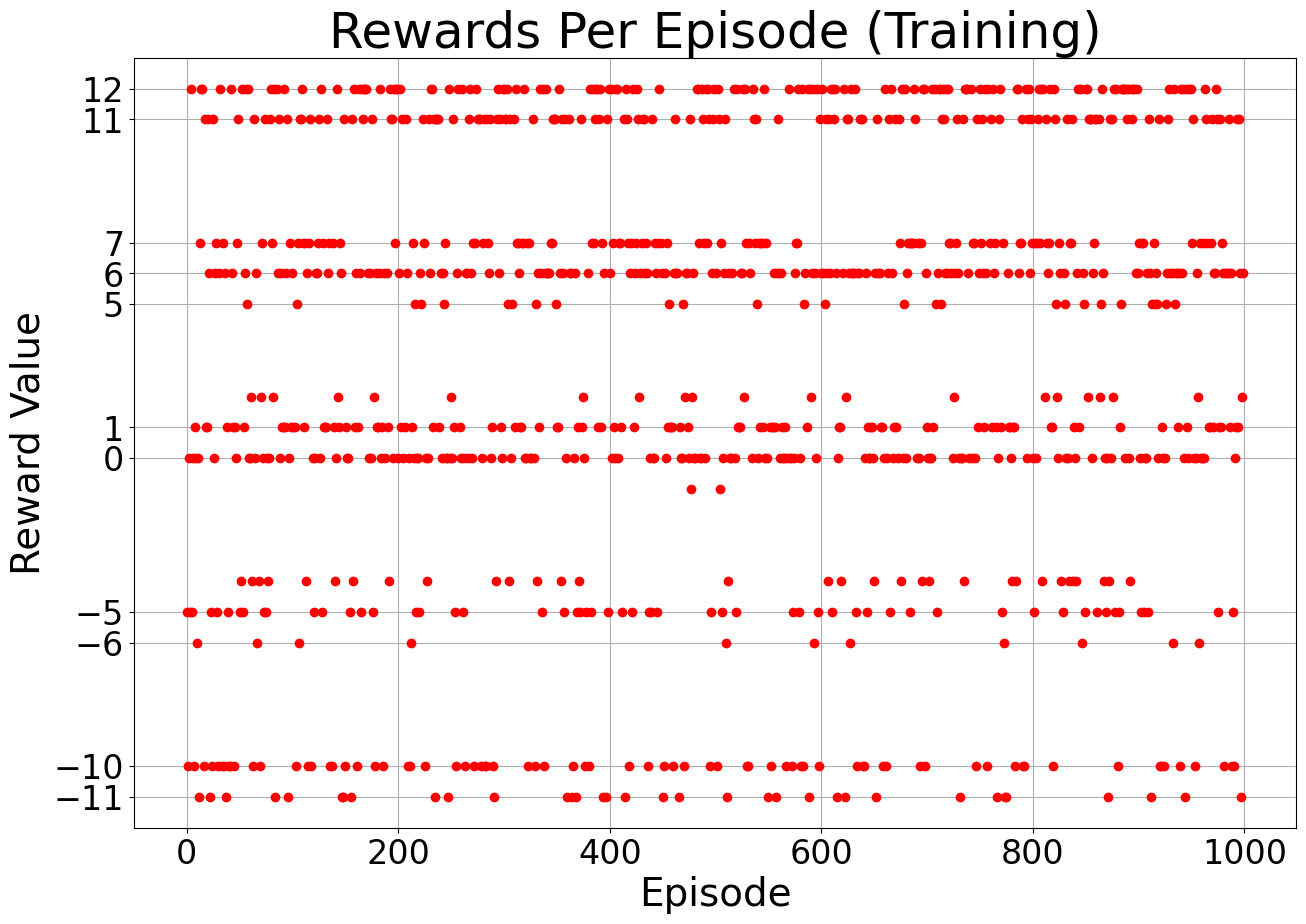

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(reward_episodes2, 'ro')
plt.xlabel('Episode', fontsize=28)
plt.ylabel('Reward Value', fontsize=28)
plt.title('Rewards Per Episode (Training)', fontsize=36)
plt.xticks(fontsize=24)
plt.yticks([-11,-10,-6, -5, 0,1, 5,6,7,11,12], fontsize=24)
plt.ylim(ymin=-12, ymax=13)
plt.grid()
plt.show()

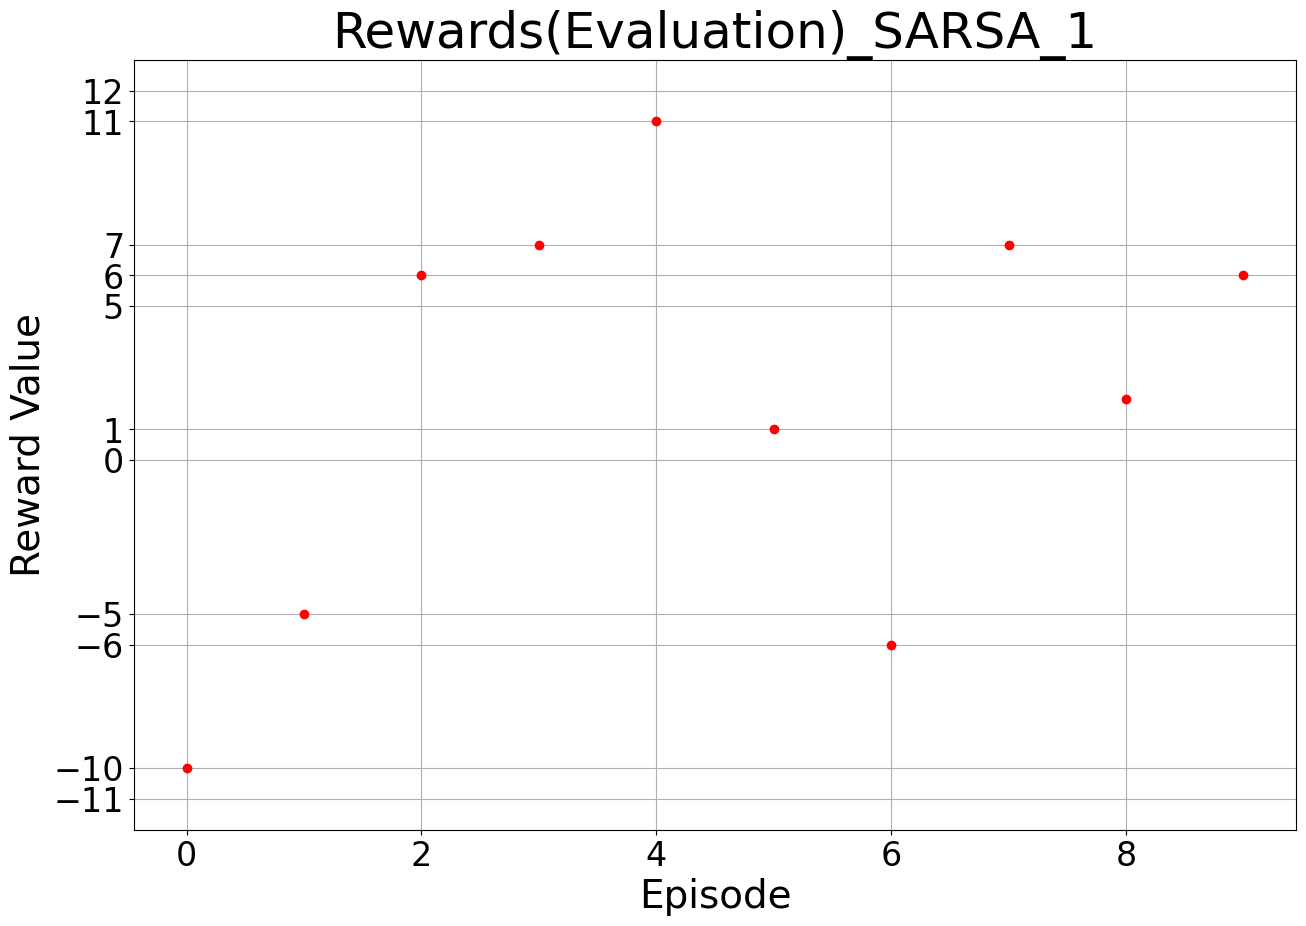

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(reward_episodes_evaluation_SARSA_2, 'ro')
plt.xlabel('Episode', fontsize=28)
plt.ylabel('Reward Value', fontsize=28)
plt.title('Rewards(Evaluation)_SARSA_1', fontsize=36)
plt.xticks(fontsize=24)
plt.yticks([-11,-10,-6, -5, 0,1, 5,6,7,11,12], fontsize=24)
plt.ylim(ymin=-12, ymax=13)
plt.grid()
plt.show()

Now let's change the discount factor γ to a smaller value 0.75

epsilon min and max values to 0.01 and 0.8

In [16]:
max_e=0.9
min_e=0.1
episodes=1000
alpha=0.7
gamma=0.75
decay_e=0.001
timesteps=50

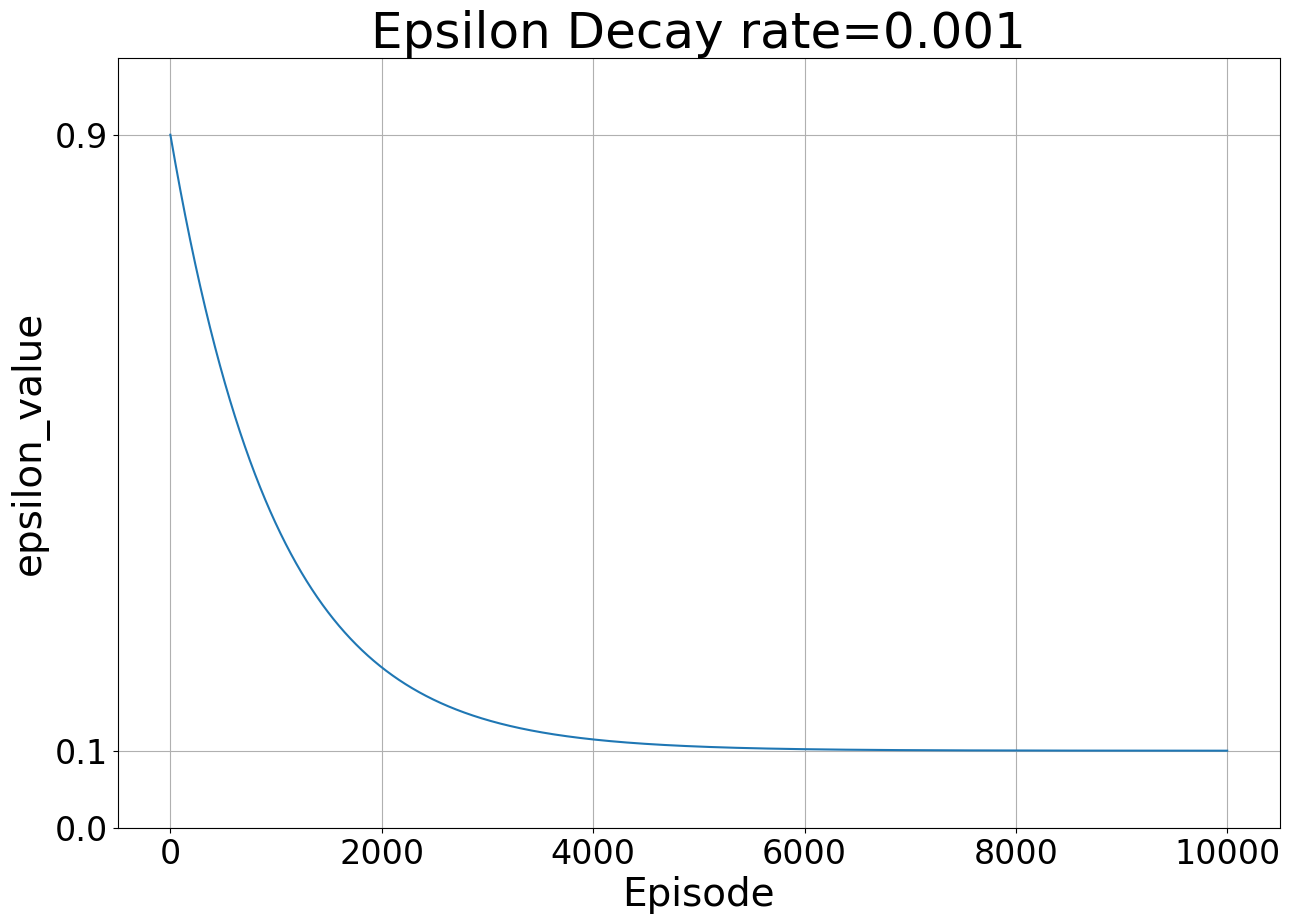

In [ ]:
# Epsilon decay graph
episodes=10000
epsilon_1=[]
for episode in range(episodes):
  epsilon=min_e + (max_e - min_e) * math.exp(-decay_e * episode)
  epsilon_1.append(epsilon)
plt.figure(figsize=(15, 10))
plt.plot(epsilon_1)
plt.xlabel('Episode', fontsize=28)
plt.ylabel('epsilon_value', fontsize=28)
plt.title('Epsilon Decay rate=0.001', fontsize=36)
plt.xticks(fontsize=24)
plt.yticks([0,0.1,0.9], fontsize=24)
plt.ylim(ymin=0, ymax=1)
plt.grid()
plt.show()

In [18]:
env=GridEnvironment(timesteps)
Q=np.zeros((env.observation_space.n,env.action_space.n))
agent=SARSAAgent(env)
reward_episodes3=[]
for episode in range(episodes):
  obs,info=env.reset()
  terminated,truncated=False,False
  epsilon = min_e + (max_e - min_e) * math.exp(-decay_e * episode)
  state=env.agent_pos[0]*4+env.agent_pos[1]
  action=agent.step(state,epsilon,Q)
  reward_covered=0
  rewards_in_episode=[]
  while not terminated:
    obs2,reward,terminated,truncated,info=env.step(action)
    state2=env.agent_pos[0]*4+env.agent_pos[1]
    action2=agent.step(state2,epsilon,Q)
    Q[state,action]= Q[state,action]+alpha*(reward+gamma*Q[state2,action2]-Q[state,action])
    if reward not in rewards_in_episode:
      rewards_in_episode.append(reward)
    state=state2
    action=action2
  reward_episodes3.append(sum(rewards_in_episode))

reward_episodes_evaluation_SARSA_3=[]
# Evaluation Results using the Q-values
for i in range(10):
  obs,info=env.reset()
  terminated,truncated=False,False
  episilon=0 # since we are trying to get only greedy actions
  state=env.agent_pos[0]*4+env.agent_pos[1]
  action=agent.step(state,epsilon,Q)
  rewards_in_evaluation=[]
  while not terminated:
    obs,reward,terminated,truncated,info=env.step(action)
    action2=agent.step(state,epsilon,Q)
    state2=env.agent_pos[0]*4+env.agent_pos[1]
    if reward not in rewards_in_evaluation:
      rewards_in_evaluation.append(reward)
    state=state2
    action=action2
  reward_episodes_evaluation_SARSA_3.append(sum(rewards_in_evaluation)) 

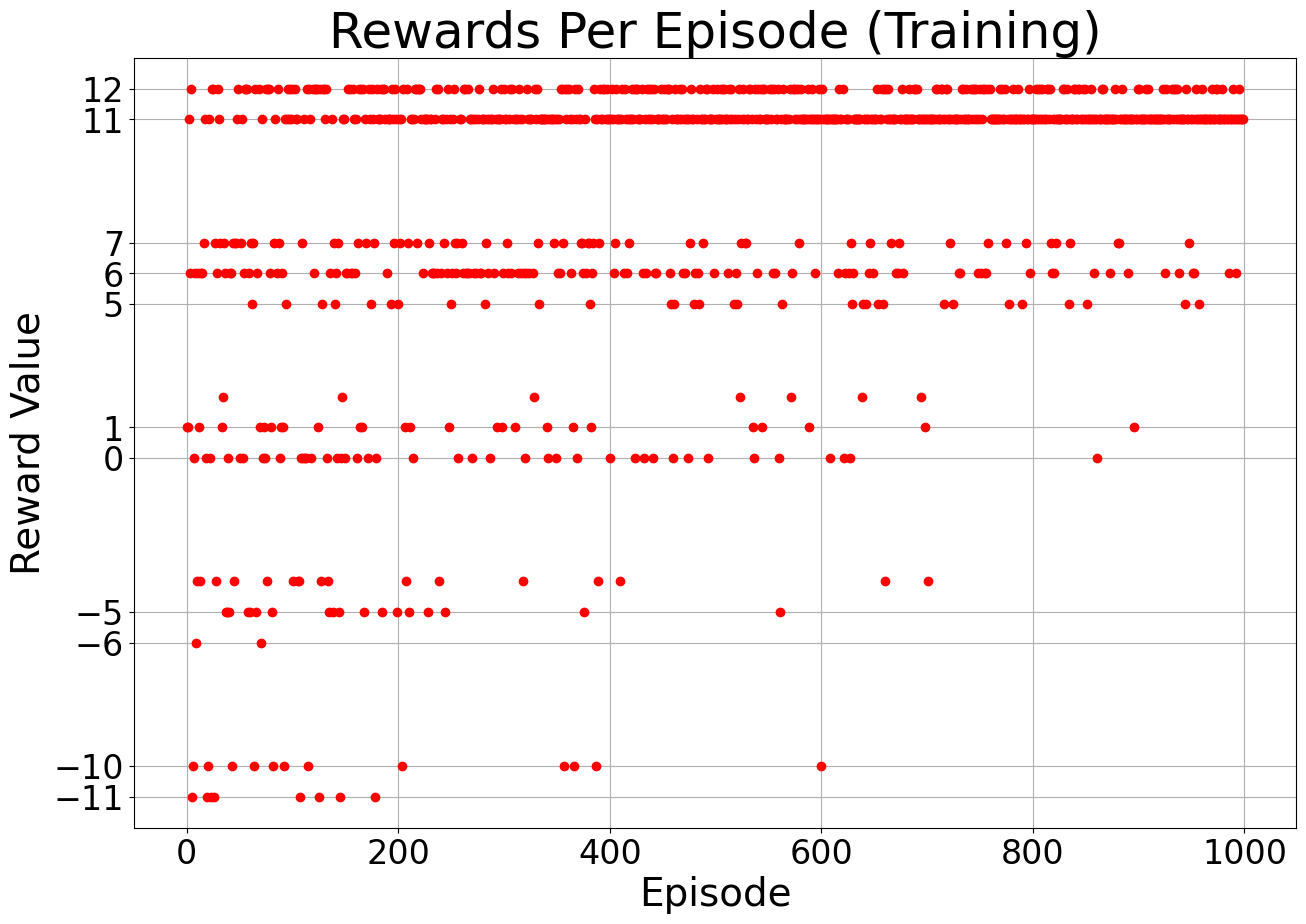

In [19]:
plt.figure(figsize=(15, 10))
plt.plot(reward_episodes3, 'ro')
plt.xlabel('Episode', fontsize=28)
plt.ylabel('Reward Value', fontsize=28)
plt.title('Rewards Per Episode (Training)', fontsize=36)
plt.xticks(fontsize=24)
plt.yticks([-11,-10,-6, -5, 0,1, 5,6,7,11,12], fontsize=24)
plt.ylim(ymin=-12, ymax=13)
plt.grid()
plt.show()

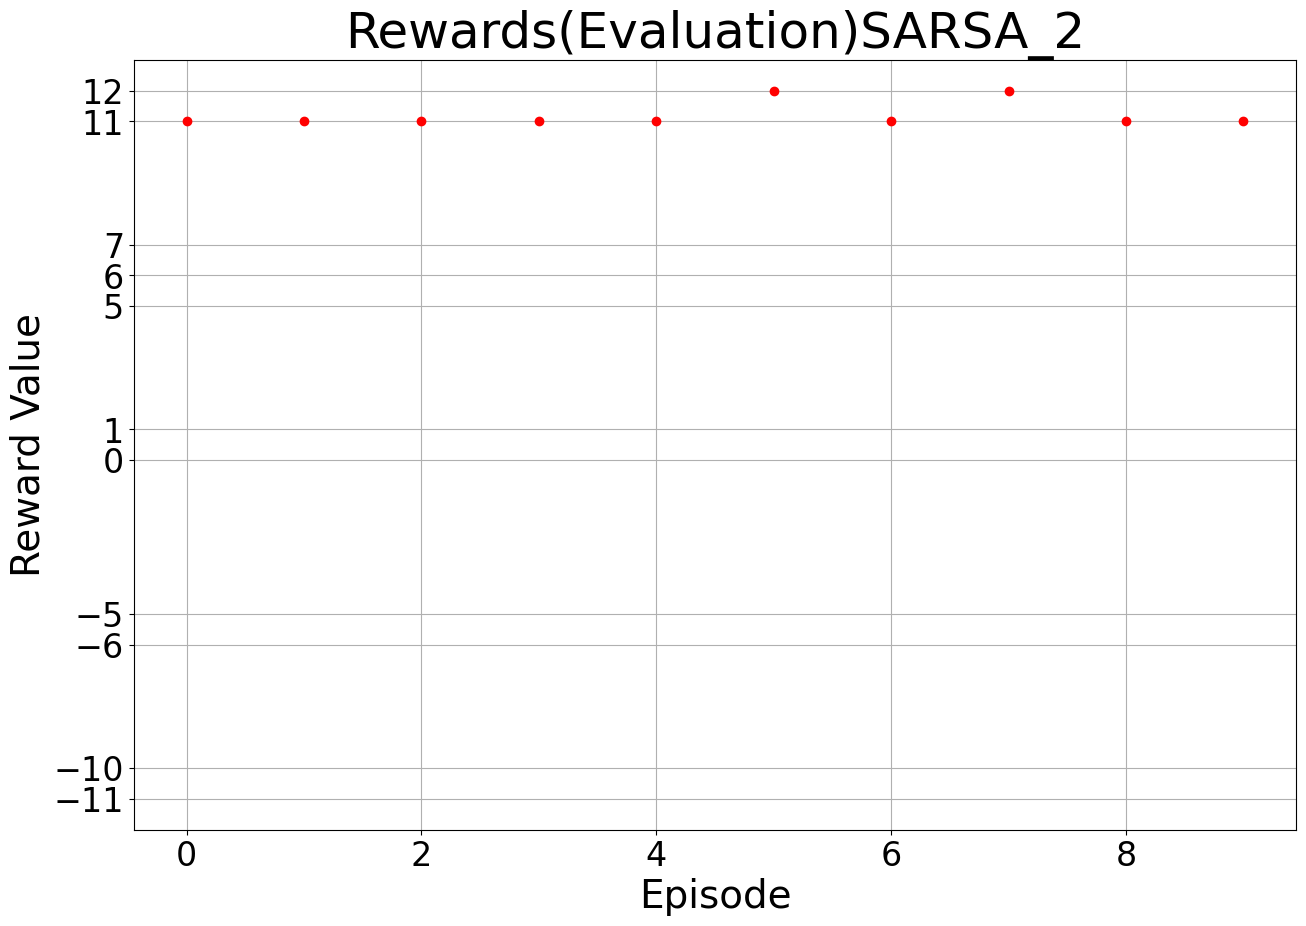

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(reward_episodes_evaluation_SARSA_3, 'ro')
plt.xlabel('Episode', fontsize=28)
plt.ylabel('Reward Value', fontsize=28)
plt.title('Rewards(Evaluation)SARSA_2', fontsize=36)
plt.xticks(fontsize=24)
plt.yticks([-11,-10,-6, -5, 0,1, 5,6,7,11,12], fontsize=24)
plt.ylim(ymin=-12, ymax=13)
plt.grid()
plt.show()

In [ ]:
timesteps=70

Changing the timesteps to 70

In [ ]:
env=GridEnvironment(timesteps)
Q=np.zeros((env.observation_space.n,env.action_space.n))
agent=SARSAAgent(env)
reward_episodes4=[]
for episode in range(episodes):
  obs,info=env.reset()
  terminated,truncated=False,False
  epsilon = min_e + (max_e - min_e) * math.exp(-decay_e * episode)
  state=env.agent_pos[0]*4+env.agent_pos[1]
  action=agent.step(state,epsilon,Q)
  reward_covered=0
  rewards_in_episode=[]
  while not terminated:
    obs2,reward,terminated,truncated,info=env.step(action)
    action2=agent.step(state,epsilon,Q)
    state2=env.agent_pos[0]*4+env.agent_pos[1]
    Q[state,action]= Q[state,action]+alpha*(reward+gamma*Q[state2,action2]-Q[state,action])
    if reward not in rewards_in_episode:
      rewards_in_episode.append(reward)
    state=state2
    action=action2
  reward_episodes4.append(sum(rewards_in_episode))

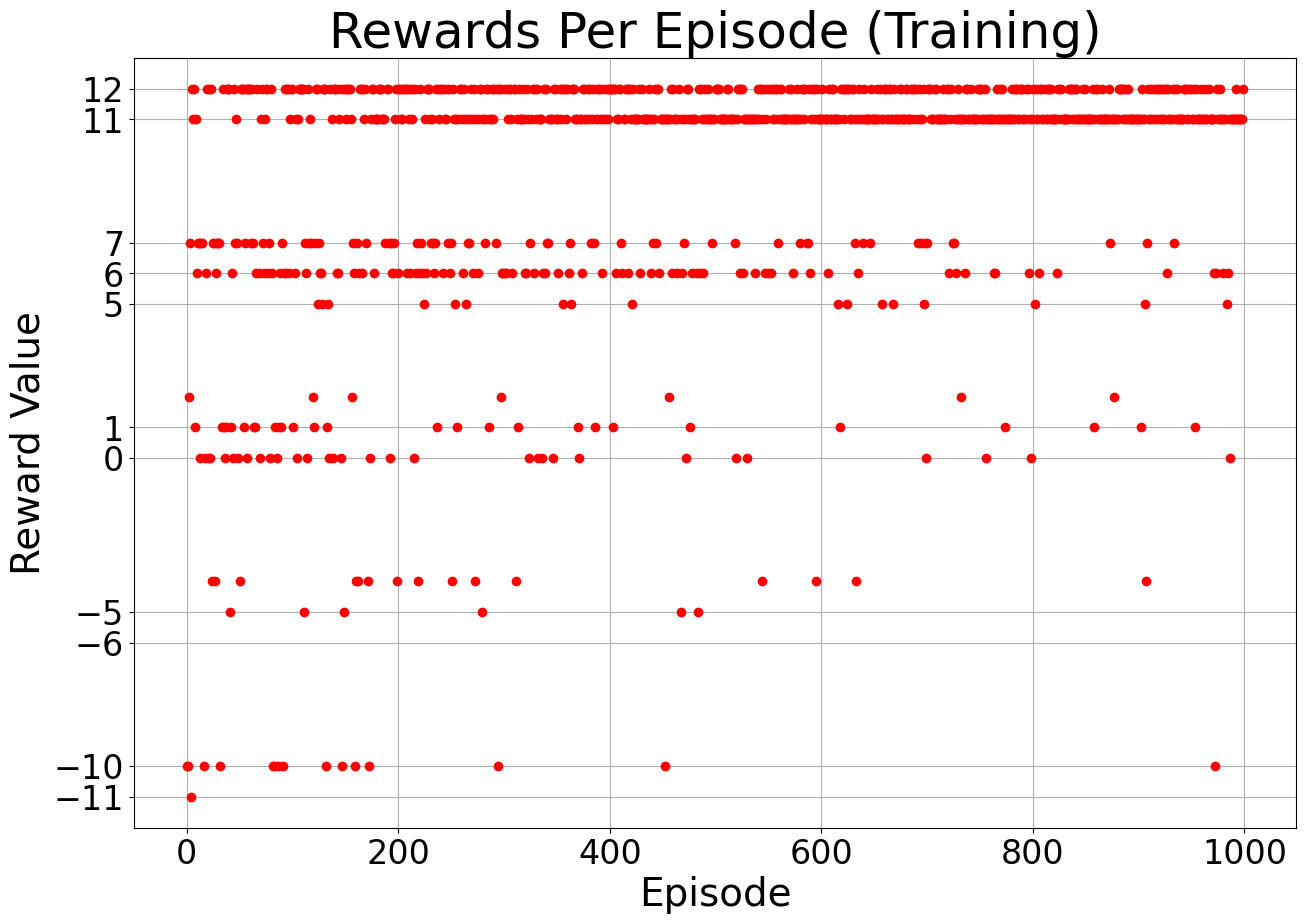

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(reward_episodes4, 'ro')
plt.xlabel('Episode', fontsize=28)
plt.ylabel('Reward Value', fontsize=28)
plt.title('Rewards Per Episode (Training)', fontsize=36)
plt.xticks(fontsize=24)
plt.yticks([-11,-10,-6, -5, 0,1, 5,6,7,11,12], fontsize=24)
plt.ylim(ymin=-12, ymax=13)
plt.grid()
plt.show()

# Part 3

## Q-Learning

In [ ]:
class QAgent:
  def __init__(self, env):
    self.env = env
    self.observation_space = env.observation_space
    self.action_space = env.action_space

  def step(self, obs,epsilon,Q):
    if np.random.uniform(0,1)< epsilon:
      action=np.random.choice(self.action_space.n)
    else:
      action=np.argmax(Q[obs,:])
    return action

In [ ]:
max_e=0.9
min_e=0.1
episodes=1000
alpha=0.8
gamma=0.9
decay_e=0.001
timesteps=20

In [ ]:
env=GridEnvironment(timesteps)
Q=np.zeros((env.observation_space.n,env.action_space.n))
agent=QAgent(env)
reward_episodes_Q_1=[]
for episode in range(episodes):
  obs,info=env.reset()
  terminated,truncated=False,False
  epsilon = min_e + (max_e - min_e) * math.exp(-decay_e * episode)
  state=env.agent_pos[0]*4+env.agent_pos[1]
  action=agent.step(state,epsilon,Q)
  reward_covered=0
  rewards_in_episode=[]
  while not terminated:
    obs2,reward,terminated,truncated,info=env.step(action)
    action2=agent.step(state,epsilon,Q)
    state2=env.agent_pos[0]*4+env.agent_pos[1]
    Q[state,action]= Q[state,action]+alpha*(reward+gamma*Q[state2,np.argmax(Q[state,:])]-Q[state,action])
    if reward not in rewards_in_episode:
      rewards_in_episode.append(reward)
    state=state2
    action=action2
  reward_episodes_Q_1.append(sum(rewards_in_episode))

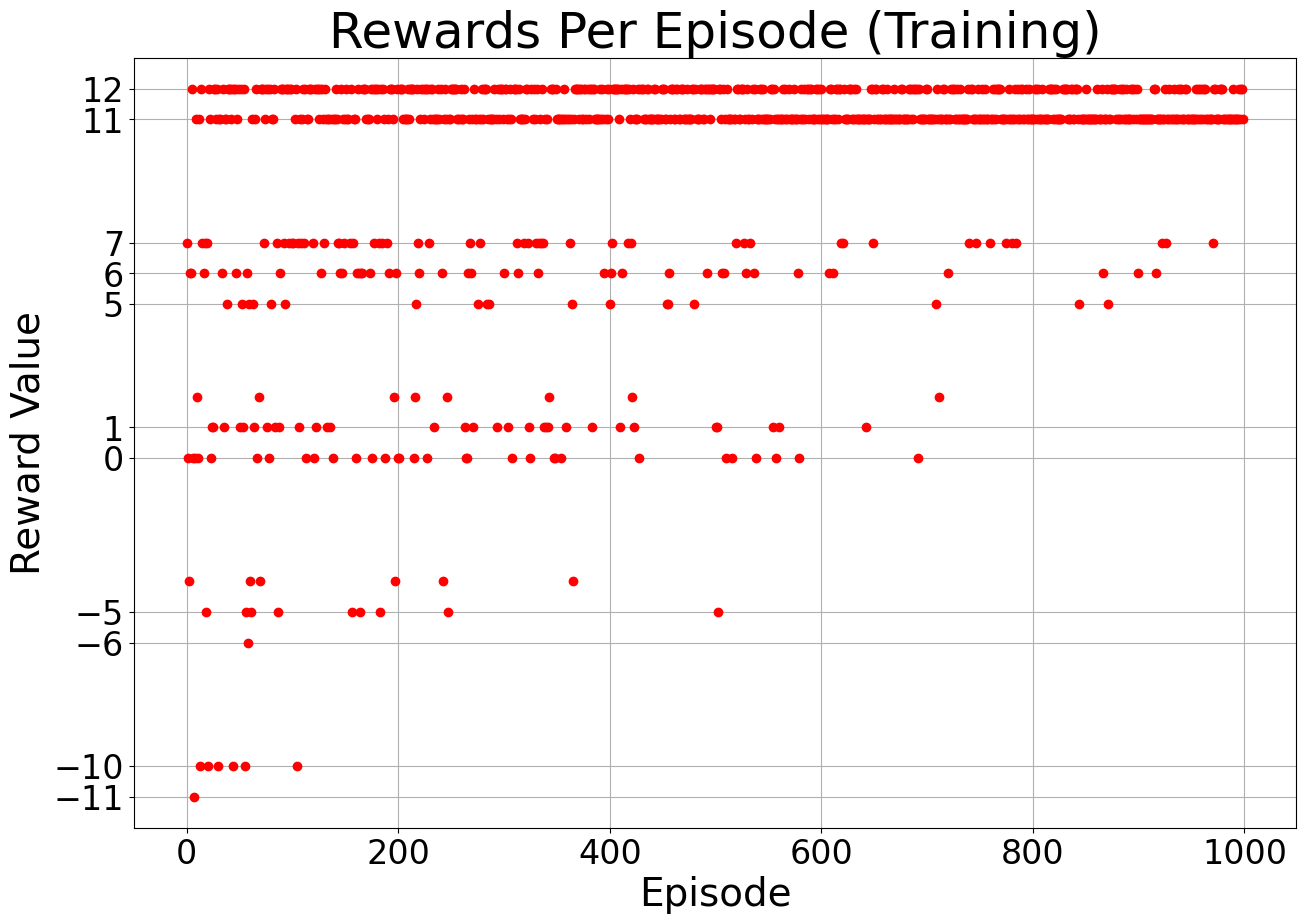

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(reward_episodes_Q_1, 'ro',label='')
plt.xlabel('Episode', fontsize=28)
plt.ylabel('Reward Value', fontsize=28)
plt.title('Rewards Per Episode (Training)', fontsize=36)
plt.xticks(fontsize=24)
plt.yticks([-11,-10,-6, -5, 0,1, 5,6,7,11,12], fontsize=24)
plt.ylim(ymin=-12, ymax=13)
plt.grid()
plt.show()

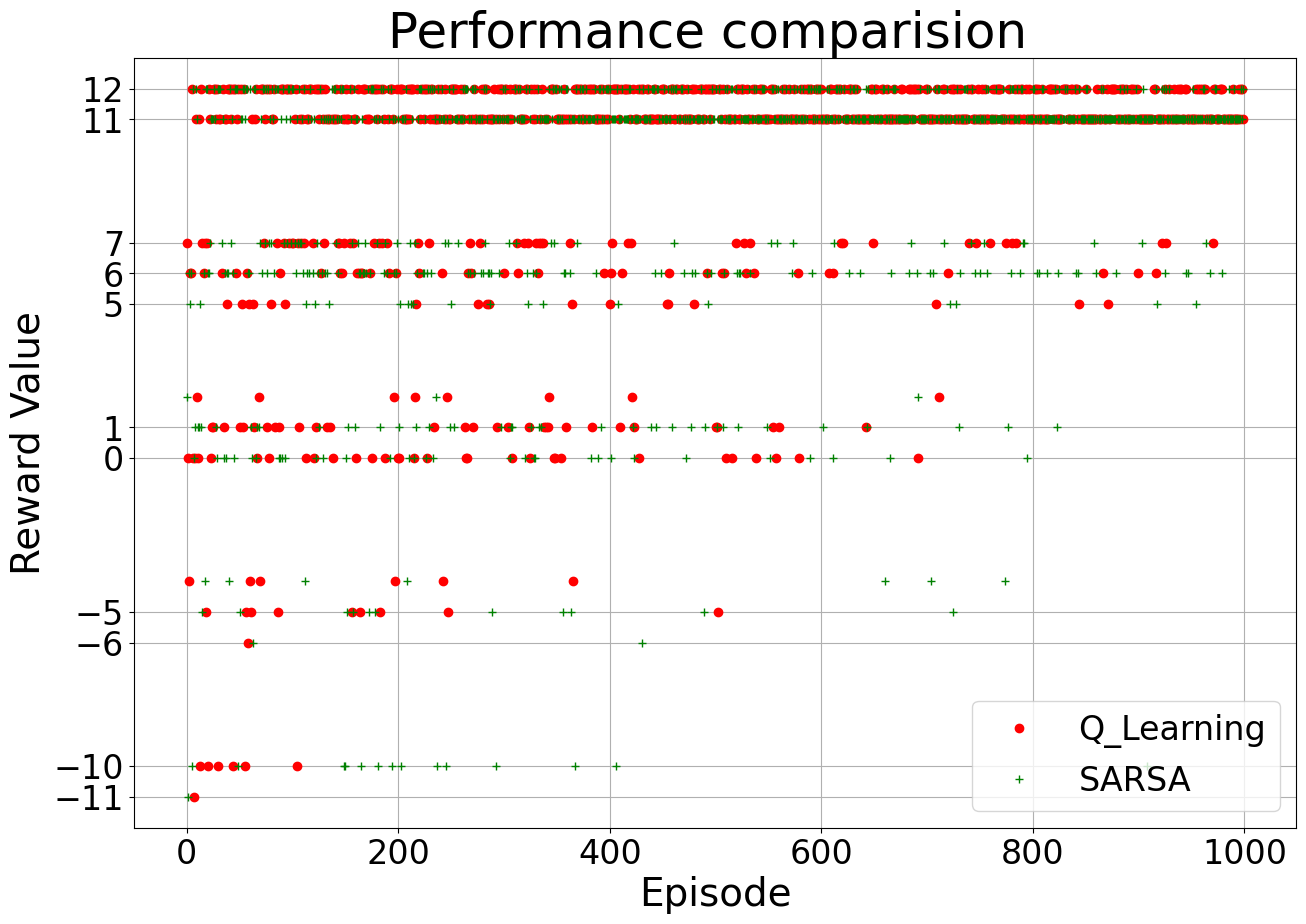

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(reward_episodes_Q_1, 'ro',label='Q_Learning')
plt.plot(reward_episodes,'g+',label='SARSA')
plt.xlabel('Episode', fontsize=28)
plt.ylabel('Reward Value', fontsize=28)
plt.title('Performance comparision ', fontsize=36)
plt.xticks(fontsize=24)
plt.yticks([-11,-10,-6, -5, 0,1, 5,6,7,11,12], fontsize=24)
plt.ylim(ymin=-12, ymax=13)
plt.legend(fontsize=24)
plt.grid()
plt.show()

Changing the Hyperparameters

After certain number of episodes after 100 the reward values slightly decreased 
negative this shows that SARSA is acting as expected but it has not covered both the positive reward values and maybe epsilon decayed too quickly.

Let's change the hyper parameters of epsilon decay rate to a smaller one 0.001 and Max timesteps to 50.

In [ ]:
episodes=10000
decay_e=0.0001
timesteps=50

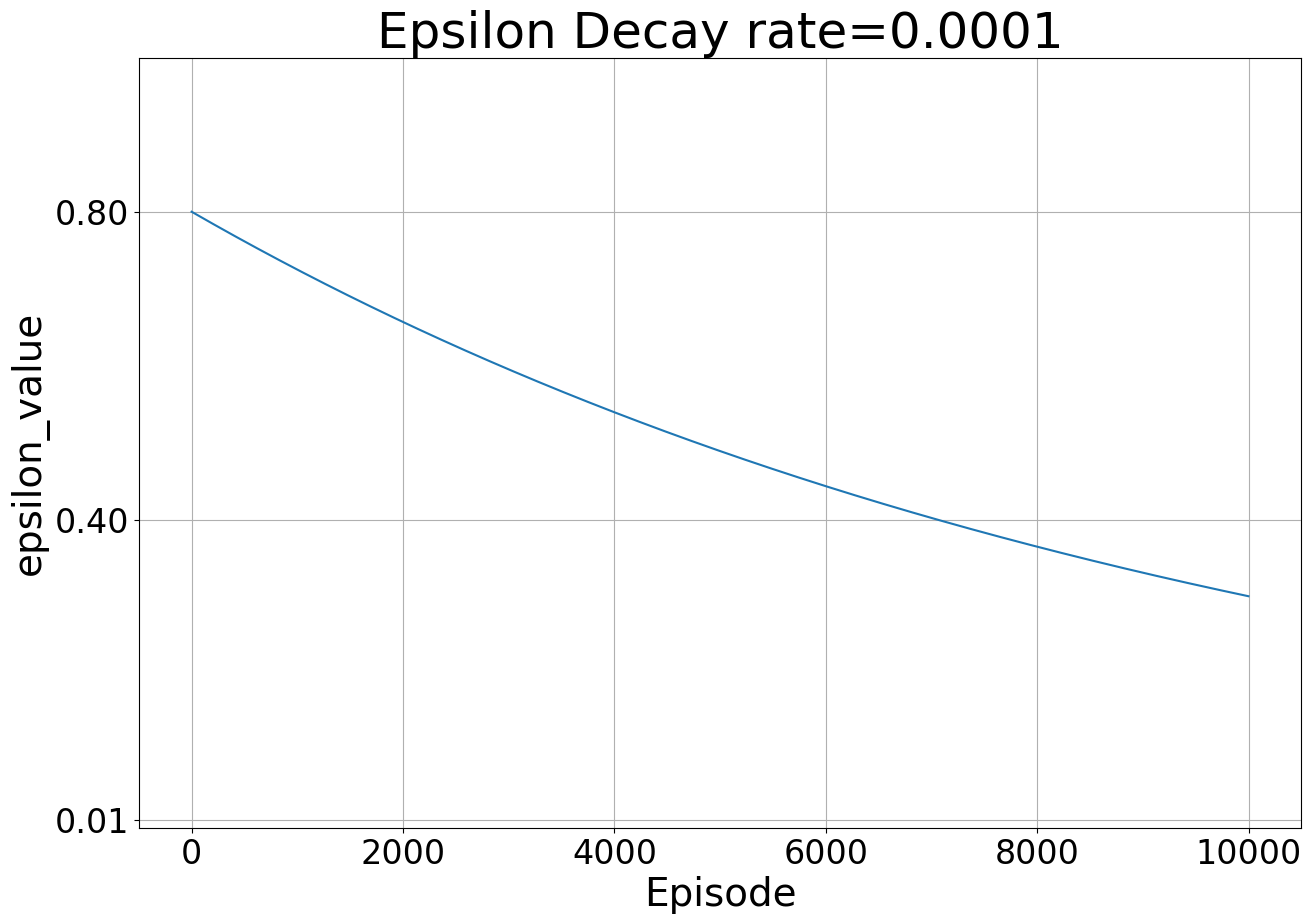

In [ ]:
epsilon_1=[]
for episode in range(episodes):
  epsilon=min_e + (max_e - min_e) * math.exp(-decay_e * episode)
  epsilon_1.append(epsilon)
plt.figure(figsize=(15, 10))
plt.plot(epsilon_1)
plt.xlabel('Episode', fontsize=28)
plt.ylabel('epsilon_value', fontsize=28)
plt.title('Epsilon Decay rate=0.0001', fontsize=36)
plt.xticks(fontsize=24)
plt.yticks([0.01,0.4,0.8], fontsize=24)
plt.ylim(ymin=0, ymax=1)
plt.grid()
plt.show()

In [ ]:
env=GridEnvironment(timesteps)
Q=np.zeros((env.observation_space.n,env.action_space.n))
agent=QAgent(env)
reward_episodes_Q_2=[]
for episode in range(episodes):
  obs,info=env.reset()
  terminated,truncated=False,False
  epsilon = min_e + (max_e - min_e) * math.exp(-decay_e * episode)
  state=env.agent_pos[0]*4+env.agent_pos[1]
  action=agent.step(state,epsilon,Q)
  reward_covered=0
  rewards_in_episode=[]
  while not terminated:
    obs2,reward,terminated,truncated,info=env.step(action)
    action2=agent.step(state,epsilon,Q)
    state2=env.agent_pos[0]*4+env.agent_pos[1]
    Q[state,action]= Q[state,action]+alpha*(reward+gamma*Q[state2,np.argmax(Q[state,:])]-Q[state,action])
    if reward not in rewards_in_episode:
      rewards_in_episode.append(reward)
    state=state2
    action=action2
  reward_episodes_Q_2.append(sum(rewards_in_episode))

reward_episodes_evaluation_Q_2=[]
# Evaluation Results using the Q-values
for i in range(10):
  obs,info=env.reset()
  terminated,truncated=False,False
  episilon=0 # since we are trying to get only greedy actions
  state=env.agent_pos[0]*4+env.agent_pos[1]
  action=agent.step(state,epsilon,Q)
  rewards_in_evaluation=[]
  while not terminated:
    obs,reward,terminated,truncated,info=env.step(action)
    action2=agent.step(state,epsilon,Q)
    state2=env.agent_pos[0]*4+env.agent_pos[1]
    if reward not in rewards_in_evaluation:
      rewards_in_evaluation.append(reward)
    state=state2
    action=action2
  reward_episodes_evaluation_Q_2.append(sum(rewards_in_evaluation))  

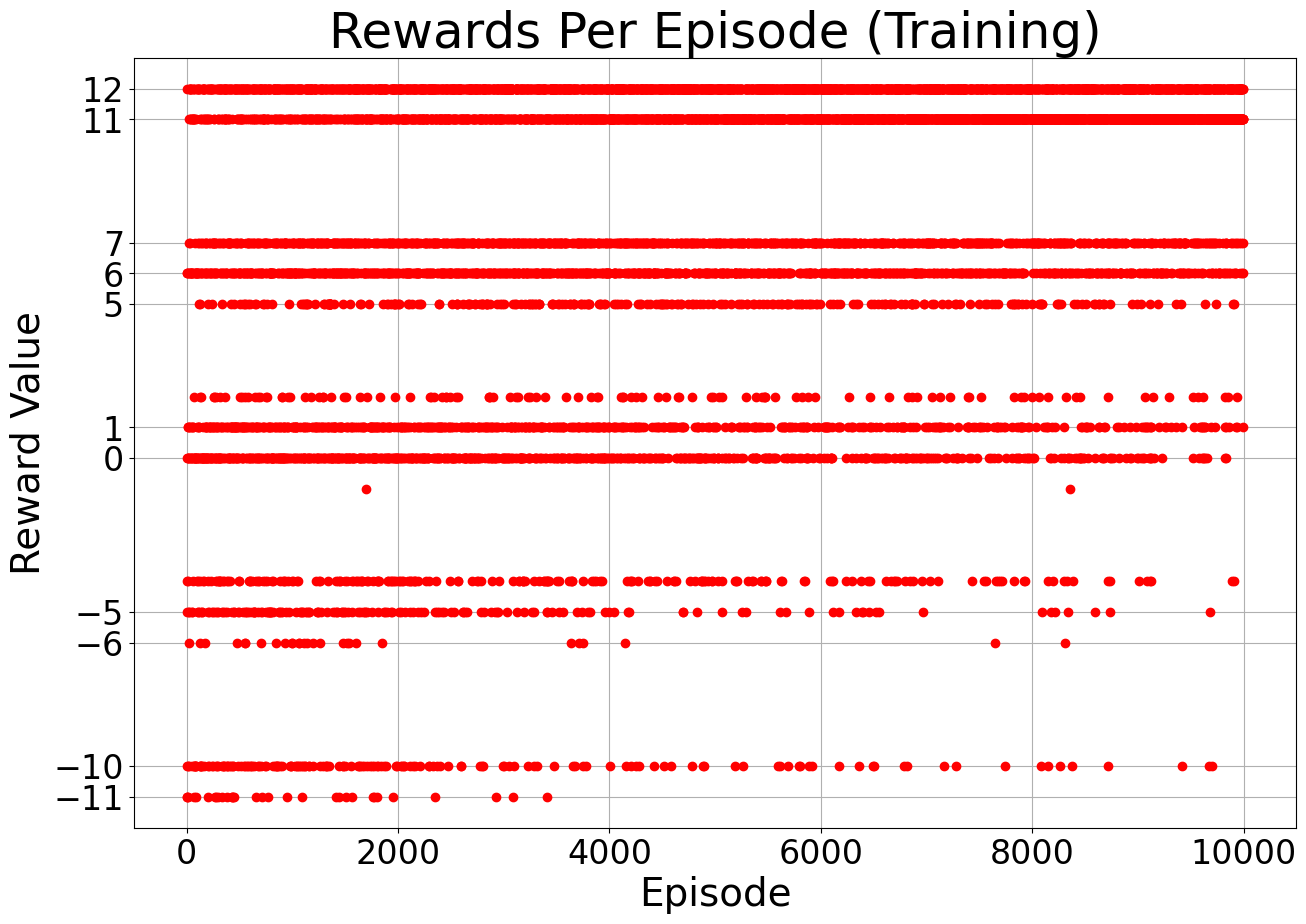

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(reward_episodes_Q_2, 'ro')
plt.xlabel('Episode', fontsize=28)
plt.ylabel('Reward Value', fontsize=28)
plt.title('Rewards Per Episode (Training)', fontsize=36)
plt.xticks(fontsize=24)
plt.yticks([-11,-10,-6, -5, 0,1, 5,6,7,11,12], fontsize=24)
plt.ylim(ymin=-12, ymax=13)
plt.grid()
plt.show()

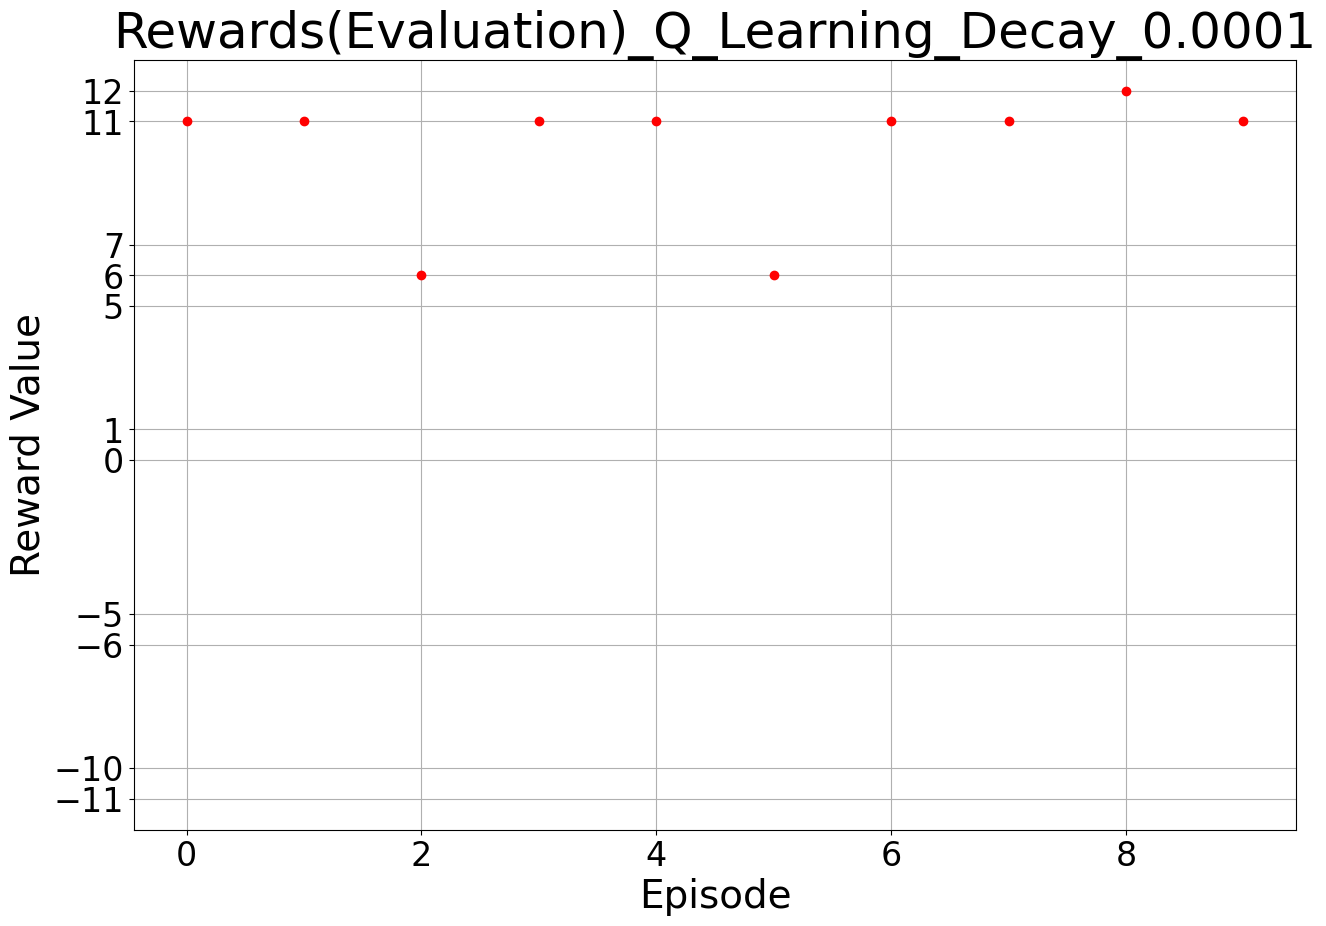

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(reward_episodes_evaluation_Q_2, 'ro')
plt.xlabel('Episode', fontsize=28)
plt.ylabel('Reward Value', fontsize=28)
plt.title('Rewards(Evaluation)_Q_Learning_Decay_0.0001', fontsize=36)
plt.xticks(fontsize=24)
plt.yticks([-11,-10,-6, -5, 0,1, 5,6,7,11,12], fontsize=24)
plt.ylim(ymin=-12, ymax=13)
plt.grid()
plt.show()

Let's try with an higher epsilon rate
e=0.01

In [ ]:
episodes=1000
decay_e=0.01
timesteps=50

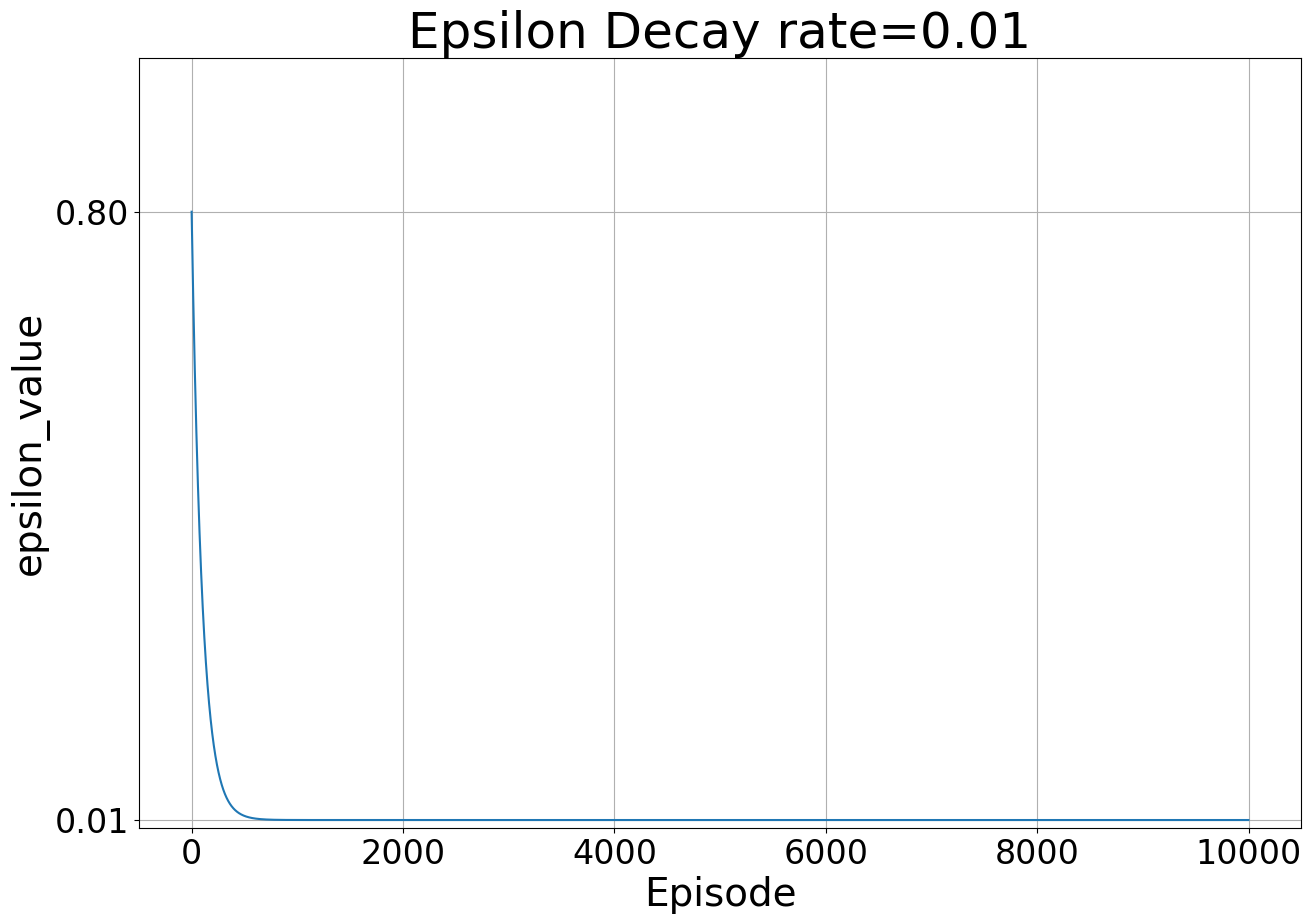

In [ ]:
episodes=10000
epsilon_1=[]
for episode in range(episodes):
  epsilon=min_e + (max_e - min_e) * math.exp(-decay_e * episode)
  epsilon_1.append(epsilon)
plt.figure(figsize=(15, 10))
plt.plot(epsilon_1)
plt.xlabel('Episode', fontsize=28)
plt.ylabel('epsilon_value', fontsize=28)
plt.title('Epsilon Decay rate=0.01', fontsize=36)
plt.xticks(fontsize=24)
plt.yticks([0.01,0.8], fontsize=24)
plt.ylim(ymin=0, ymax=1)
plt.grid()
plt.show()

In [ ]:
env=GridEnvironment(timesteps)
Q=np.zeros((env.observation_space.n,env.action_space.n))
agent=QAgent(env)
reward_episodes_Q_3=[]
for episode in range(episodes):
  obs,info=env.reset()
  terminated,truncated=False,False
  epsilon = min_e + (max_e - min_e) * math.exp(-decay_e * episode)
  state=env.agent_pos[0]*4+env.agent_pos[1]
  action=agent.step(state,epsilon,Q)
  reward_covered=0
  rewards_in_episode=[]
  while not terminated:
    obs2,reward,terminated,truncated,info=env.step(action)
    action2=agent.step(state,epsilon,Q)
    state2=env.agent_pos[0]*4+env.agent_pos[1]
    Q[state,action]= Q[state,action]+alpha*(reward+gamma*Q[state2,np.argmax(Q[state,:])]-Q[state,action])
    if reward not in rewards_in_episode:
      rewards_in_episode.append(reward)
    state=state2
    action=action2
  reward_episodes_Q_3.append(sum(rewards_in_episode))

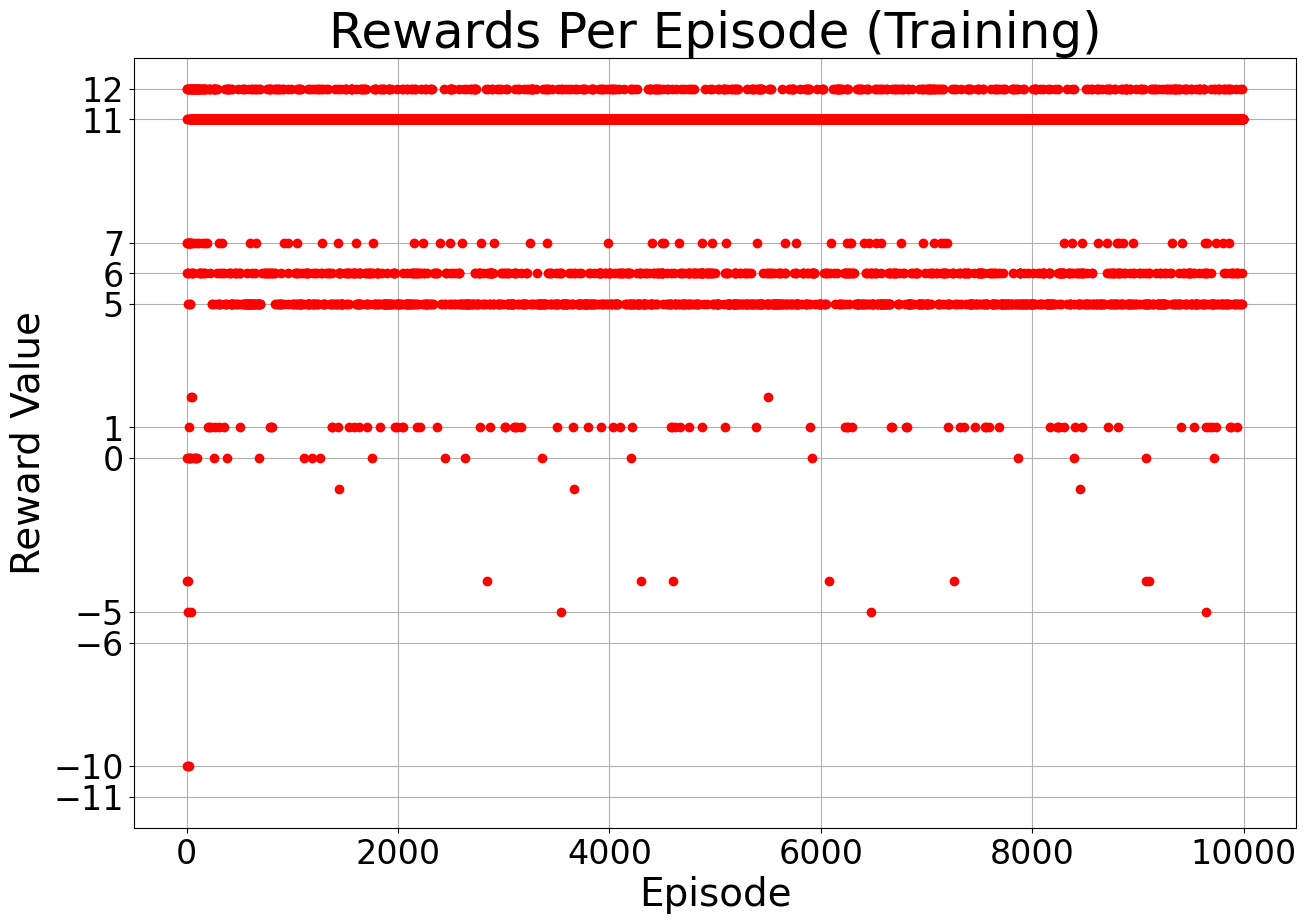

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(reward_episodes_Q_3, 'ro')
plt.xlabel('Episode', fontsize=28)
plt.ylabel('Reward Value', fontsize=28)
plt.title('Rewards Per Episode (Training)', fontsize=36)
plt.xticks(fontsize=24)
plt.yticks([-11,-10,-6, -5, 0,1, 5,6,7,11,12], fontsize=24)
plt.ylim(ymin=-12, ymax=13)
plt.grid()
plt.show()

Let's increase the timesteps to 100

In [ ]:
episodes=10000
decay_e=0.01
timesteps=100

In [ ]:
env=GridEnvironment(timesteps)
Q=np.zeros((env.observation_space.n,env.action_space.n))
agent=QAgent(env)
reward_episodes_Q_4=[]
for episode in range(episodes):
  obs,info=env.reset()
  terminated,truncated=False,False
  epsilon = min_e + (max_e - min_e) * math.exp(-decay_e * episode)
  state=env.agent_pos[0]*4+env.agent_pos[1]
  action=agent.step(state,epsilon,Q)
  reward_covered=0
  rewards_in_episode=[]
  while not terminated:
    obs2,reward,terminated,truncated,info=env.step(action)
    action2=agent.step(state,epsilon,Q)
    state2=env.agent_pos[0]*4+env.agent_pos[1]
    Q[state,action]= Q[state,action]+alpha*(reward+gamma*Q[state2,np.argmax(Q[state,:])]-Q[state,action])
    if reward not in rewards_in_episode:
      rewards_in_episode.append(reward)
    state=state2
    action=action2
  reward_episodes_Q_4.append(sum(rewards_in_episode))

reward_episodes_evaluation_Q_4=[]
# Evaluation Results using the Q-values
for i in range(10):
  obs,info=env.reset()
  terminated,truncated=False,False
  episilon=0 # since we are trying to get only greedy actions
  state=env.agent_pos[0]*4+env.agent_pos[1]
  action=agent.step(state,epsilon,Q)
  rewards_in_evaluation=[]
  while not terminated:
    obs,reward,terminated,truncated,info=env.step(action)
    action2=agent.step(state,epsilon,Q)
    state2=env.agent_pos[0]*4+env.agent_pos[1]
    if reward not in rewards_in_evaluation:
      rewards_in_evaluation.append(reward)
    state=state2
    action=action2
  reward_episodes_evaluation_Q_4.append(sum(rewards_in_evaluation))      

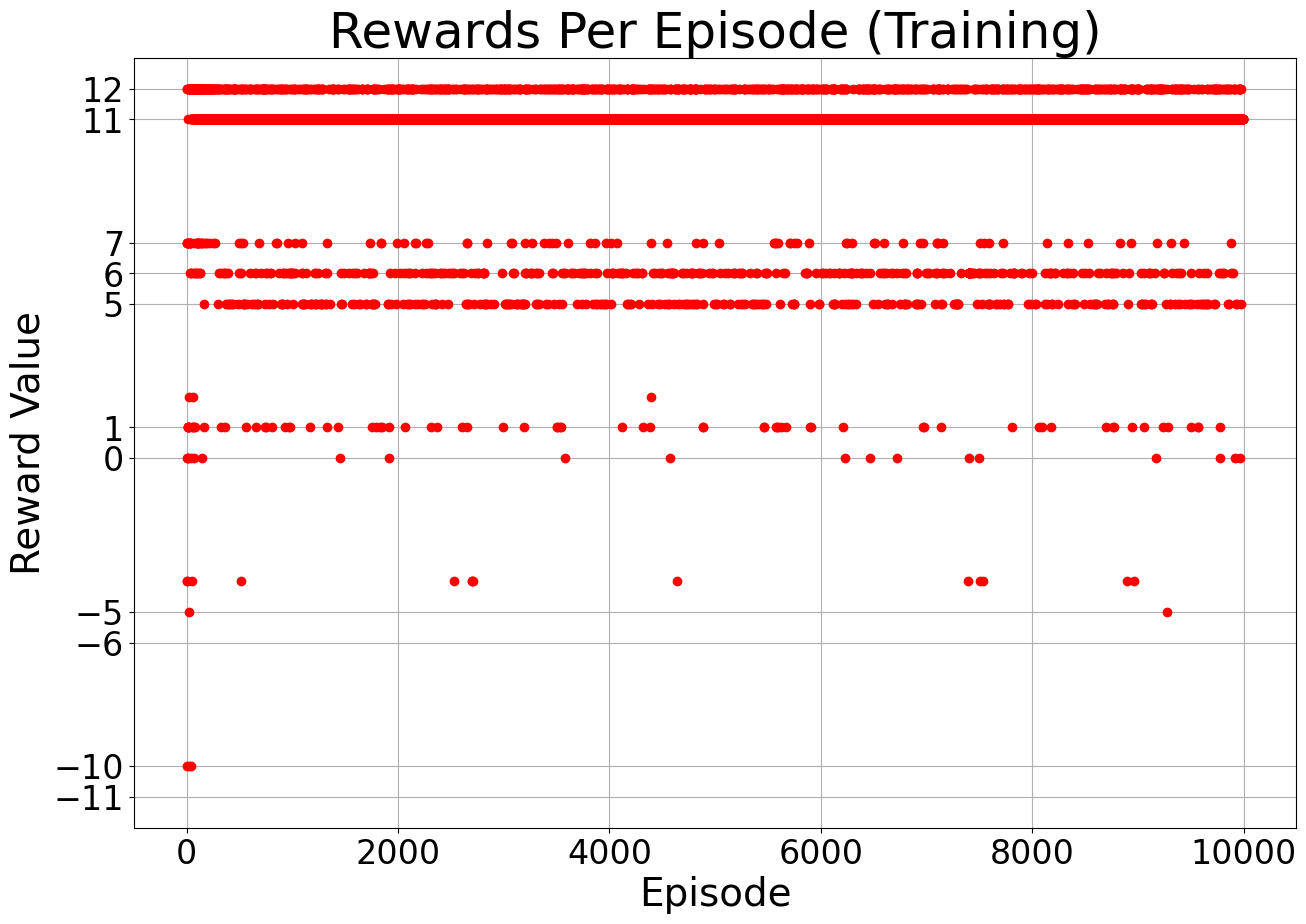

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(reward_episodes_Q_4, 'ro')
plt.xlabel('Episode', fontsize=28)
plt.ylabel('Reward Value', fontsize=28)
plt.title('Rewards Per Episode (Training)', fontsize=36)
plt.xticks(fontsize=24)
plt.yticks([-11,-10,-6, -5, 0,1, 5,6,7,11,12], fontsize=24)
plt.ylim(ymin=-12, ymax=13)
plt.grid()
plt.show()

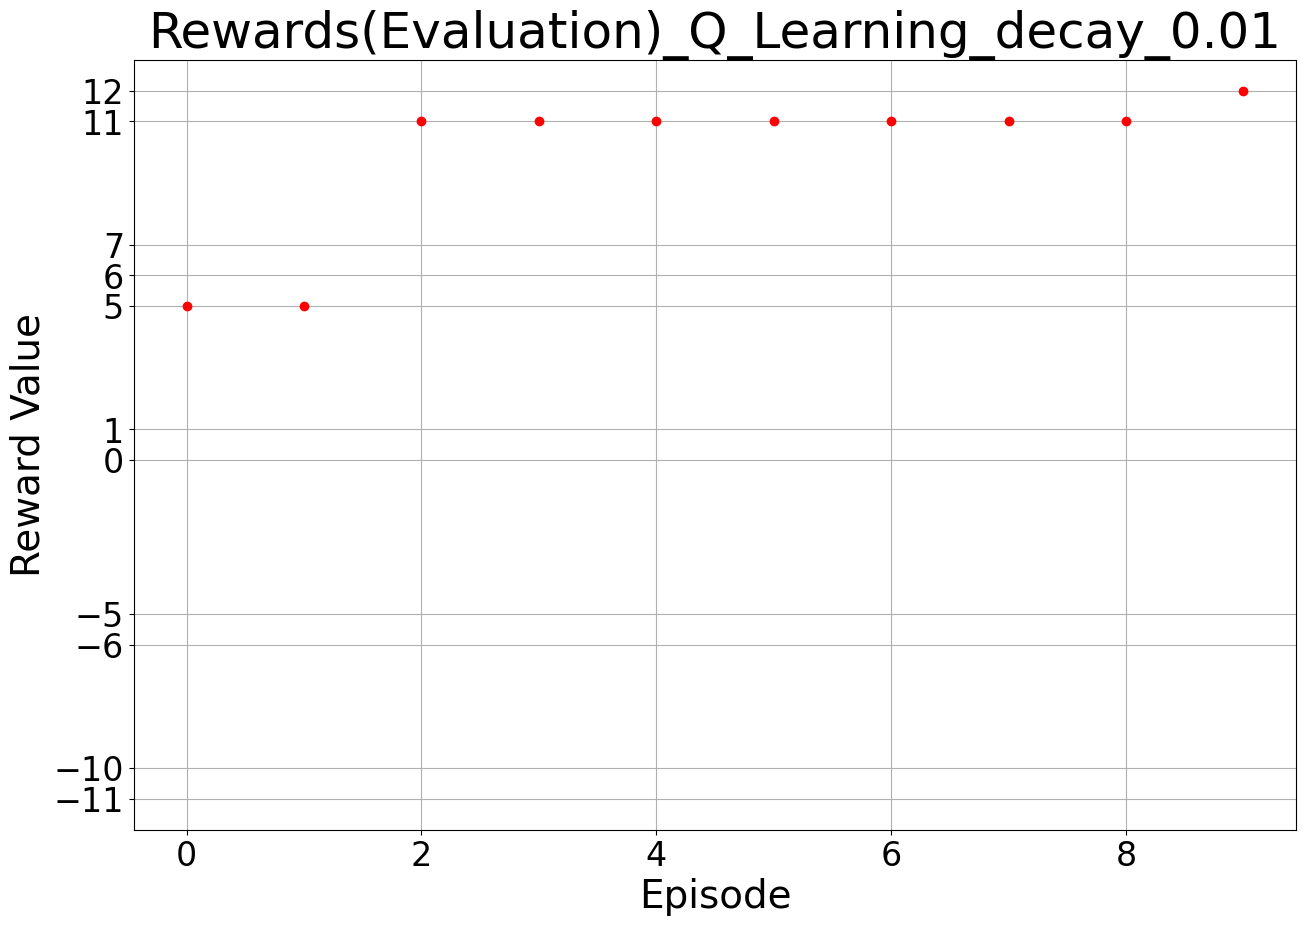

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(reward_episodes_evaluation_Q_4, 'ro')
plt.xlabel('Episode', fontsize=28)
plt.ylabel('Reward Value', fontsize=28)
plt.title('Rewards(Evaluation)_Q_Learning_decay_0.01', fontsize=36)
plt.xticks(fontsize=24)
plt.yticks([-11,-10,-6, -5, 0,1, 5,6,7,11,12], fontsize=24)
plt.ylim(ymin=-12, ymax=13)
plt.grid()
plt.show()

The max value of reward is not occured at all episodes when epsilon decay rate is higher.

Let's go back to the smaller one.

# Bonus

## n-step SARSA

Creating a class for the implementation of SARSA 2-step bootstrapping. 

In [9]:
class SARSA_2_Agent:
  def __init__(self, env):
    self.env = env
    self.observation_space = env.observation_space
    self.action_space = env.action_space

  def step(self, obs,epsilon,Q):
    if np.random.uniform(0,1)< epsilon:
      action=np.random.choice(self.action_space.n)
    else:
      action=np.argmax(Q[obs,:])
    return action

In [26]:
max_e=0.9
min_e=0.1
episodes=1000
alpha=0.8
gamma=0.9
decay_e=0.001
timesteps=50

In [27]:
env=GridEnvironment(timesteps)
V=np.zeros((env.observation_space.n,env.action_space.n))# creating the initalization.
agent=SARSA_2_Agent(env)
reward_episodes_SARSA_2step=[]
for episode in range(episodes):
  obs,info=env.reset()
  terminated,truncated=False,False
  epsilon = min_e + (max_e - min_e) * math.exp(-decay_e * episode)
  state=env.agent_pos[0]*4+env.agent_pos[1]
  action=agent.step(state,epsilon,Q)
  obs2,reward,terminated,truncated,info=env.step(action)
  state2=env.agent_pos[0]*4+env.agent_pos[1]
  action2=agent.step(state2,epsilon,Q)
  reward_covered=0
  rewards_in_episode=[]
  while not terminated:
    obs3,reward2,terminated2,truncated2,info2=env.step(action2)
    state3=env.agent_pos[0]*4+env.agent_pos[1]
    action3=agent.step(state3,epsilon,Q)
    V[state,action]= V[state,action]+alpha*(reward+gamma*reward2+(gamma**2)*V[state3,action3]-V[state,action])
    if reward not in rewards_in_episode:
      rewards_in_episode.append(reward)
    state=state2
    action=action2
    state2=state3
    action2=action3
    terminated=terminated2
    reward=reward2
  reward_episodes_SARSA_2step.append(sum(rewards_in_episode))

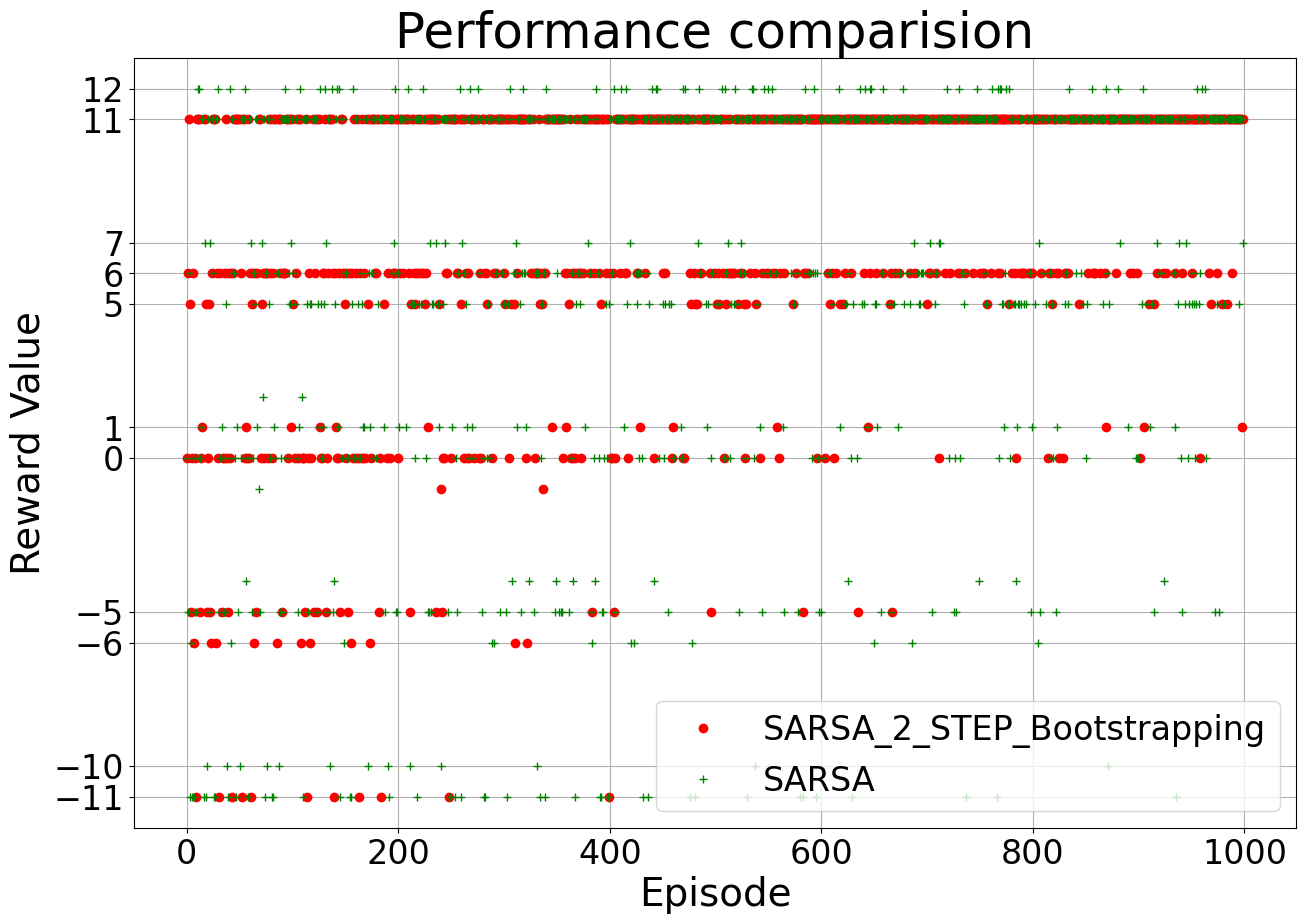

In [28]:
plt.figure(figsize=(15, 10))
plt.plot(reward_episodes_SARSA_2step, 'ro',label='SARSA_2_STEP_Bootstrapping')
plt.plot(reward_episodes,'g+',label='SARSA')
plt.xlabel('Episode', fontsize=28)
plt.ylabel('Reward Value', fontsize=28)
plt.title('Performance comparision', fontsize=36)
plt.xticks(fontsize=24)
plt.yticks([-11,-10,-6, -5, 0,1, 5,6,7,11,12], fontsize=24)
plt.ylim(ymin=-12, ymax=13)
plt.legend(fontsize=24)
plt.grid()
plt.show()

In [29]:
max_e=0.9
min_e=0.1
episodes=1000
alpha=0.8
gamma=0.9
decay_e=0.001
timesteps=100

In [31]:
env=GridEnvironment(timesteps)
V=np.zeros((env.observation_space.n,env.action_space.n))# creating the initalization.
agent=SARSA_2_Agent(env)
reward_episodes_SARSA_2step_2=[]
for episode in range(episodes):
  obs,info=env.reset()
  terminated,truncated=False,False
  epsilon = min_e + (max_e - min_e) * math.exp(-decay_e * episode)
  state=env.agent_pos[0]*4+env.agent_pos[1]
  action=agent.step(state,epsilon,Q)
  obs2,reward,terminated,truncated,info=env.step(action)
  state2=env.agent_pos[0]*4+env.agent_pos[1]
  action2=agent.step(state2,epsilon,Q)
  reward_covered=0
  rewards_in_episode=[]
  while not terminated:
    obs3,reward2,terminated2,truncated2,info2=env.step(action2)
    state3=env.agent_pos[0]*4+env.agent_pos[1]
    action3=agent.step(state3,epsilon,Q)
    V[state,action]= V[state,action]+alpha*(reward+gamma*reward2+(gamma**2)*V[state3,action3]-V[state,action])
    if reward not in rewards_in_episode:
      rewards_in_episode.append(reward)
    state=state2
    action=action2
    state2=state3
    action2=action3
    terminated=terminated2
    reward=reward2
  reward_episodes_SARSA_2step_2.append(sum(rewards_in_episode))

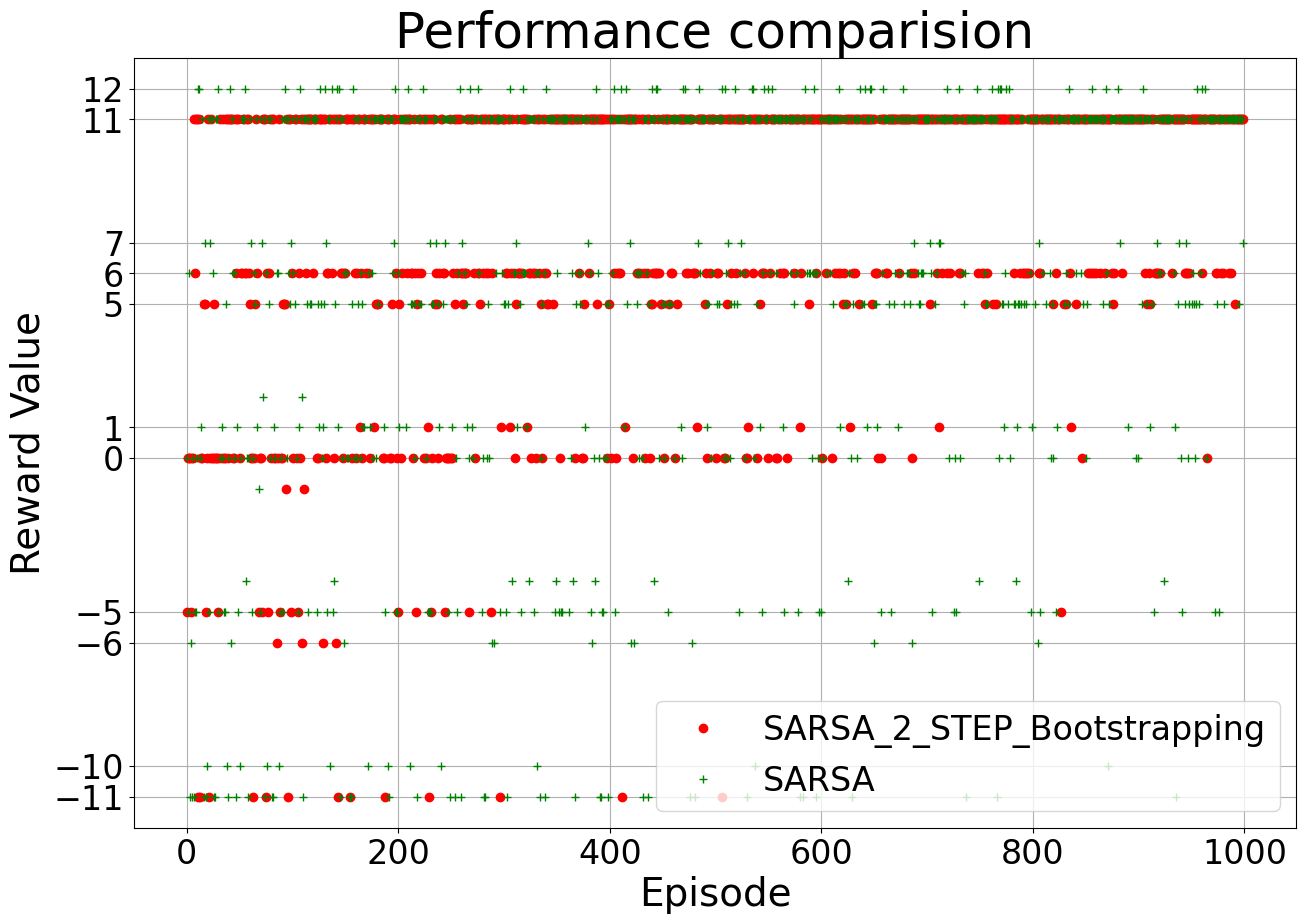

In [33]:
plt.figure(figsize=(15, 10))
plt.plot(reward_episodes_SARSA_2step_2, 'ro',label='SARSA_2_STEP_Bootstrapping')
plt.plot(reward_episodes,'g+',label='SARSA')
plt.xlabel('Episode', fontsize=28)
plt.ylabel('Reward Value', fontsize=28)
plt.title('Performance comparision', fontsize=36)
plt.xticks(fontsize=24)
plt.yticks([-11,-10,-6, -5, 0,1, 5,6,7,11,12], fontsize=24)
plt.ylim(ymin=-12, ymax=13)
plt.legend(fontsize=24)
plt.grid()
plt.show()

The bootstrapping achieved higher rewards but not the maximum.Let's increase the episodes to see the results

In [35]:
max_e=0.9
min_e=0.1
episodes=10000
alpha=0.8
gamma=0.9
decay_e=0.001
timesteps=100

In [36]:
env=GridEnvironment(timesteps)
V=np.zeros((env.observation_space.n,env.action_space.n))# creating the initalization.
agent=SARSA_2_Agent(env)
reward_episodes_SARSA_2step_3=[]
for episode in range(episodes):
  obs,info=env.reset()
  terminated,truncated=False,False
  epsilon = min_e + (max_e - min_e) * math.exp(-decay_e * episode)
  state=env.agent_pos[0]*4+env.agent_pos[1]
  action=agent.step(state,epsilon,Q)
  obs2,reward,terminated,truncated,info=env.step(action)
  state2=env.agent_pos[0]*4+env.agent_pos[1]
  action2=agent.step(state2,epsilon,Q)
  reward_covered=0
  rewards_in_episode=[]
  while not terminated:
    obs3,reward2,terminated2,truncated2,info2=env.step(action2)
    state3=env.agent_pos[0]*4+env.agent_pos[1]
    action3=agent.step(state3,epsilon,Q)
    V[state,action]= V[state,action]+alpha*(reward+gamma*reward2+(gamma**2)*V[state3,action3]-V[state,action])
    if reward not in rewards_in_episode:
      rewards_in_episode.append(reward)
    state=state2
    action=action2
    state2=state3
    action2=action3
    terminated=terminated2
    reward=reward2
  reward_episodes_SARSA_2step_3.append(sum(rewards_in_episode))

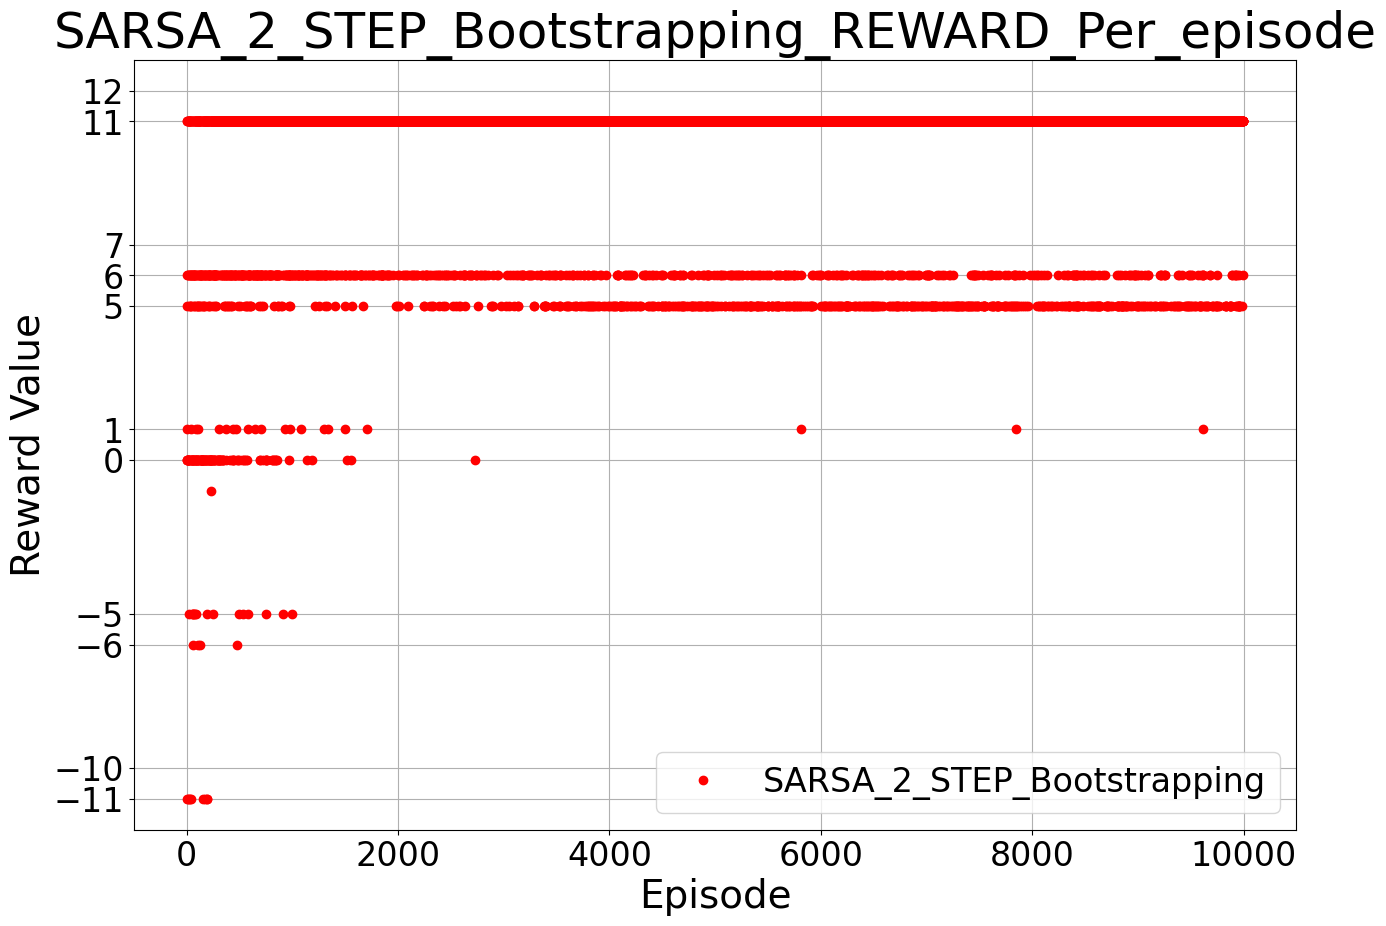

In [37]:
plt.figure(figsize=(15, 10))
plt.plot(reward_episodes_SARSA_2step_3, 'ro',label='SARSA_2_STEP_Bootstrapping')
plt.xlabel('Episode', fontsize=28)
plt.ylabel('Reward Value', fontsize=28)
plt.title('SARSA_2_STEP_Bootstrapping_REWARD_Per_episode', fontsize=36)
plt.xticks(fontsize=24)
plt.yticks([-11,-10,-6, -5, 0,1, 5,6,7,11,12], fontsize=24)
plt.ylim(ymin=-12, ymax=13)
plt.legend(fontsize=24)
plt.grid()
plt.show()

# References

1.https://piazza.com/class_profile/get_resource/ldezxxu3kf25wf/lgqkq23dnlp13w

2.https://www.geeksforgeeks.org/sarsa-reinforcement-learning/